ML4VA

Helen Yao, Eva Butler, and Larissa Cybyk

In [61]:
import pandas as pd
import numpy as np

Data Cleaning & Visualization

loading/condensing crash data:

In [62]:
import datetime
try:
    crash_data = pd.read_csv('./crash_data.csv', sep='\t')
except:

    crash_data = pd.read_csv('./CrashData_test.csv')
    # crash_data.head()

    # crash_data.isnull().sum()

    crash_data = crash_data[['RTE Name','Crash Date']]

    # print(crash_data)

    crash_data['Crash Date'] = pd.to_datetime(crash_data['Crash Date'].str.split(' ', expand=True)[0], format='%m/%d/%Y')


    duplicate = crash_data.pivot_table(index = ['RTE Name', 'Crash Date'], aggfunc ='size')

    crash_data['Total Crashes'] = crash_data.set_index(['RTE Name', 'Crash Date']).index.map(duplicate)

    crash_data = crash_data.drop_duplicates()
    print(crash_data)

    # f = open("crash_data.csv", "a")
    crash_data.to_csv("crash_data.csv", sep='\t', encoding='utf-8')
    # f.close()

In [63]:
crash_data.head()

Unnamed: 0               RTE Name  Crash Date  Total Crashes
0           0       R-VA   IS00095NB  2016-12-06             15
1           1  S-VA114NP WOODLAND RD  2016-01-26              1
2           2       R-VA066SC00640NB  2016-02-13              1
3           3       R-VA042SC00782SB  2016-03-26              1
4           4       R-VA   US00220NB  2016-07-18              1

loading/cleaning traffic volume data:

In [64]:
# load data

traffic_volume = pd.read_csv('./VDOT_Traffic_Volume.csv')

In [65]:
traffic_volume.head()

traffic_volume.columns
print(traffic_volume.shape)
nulls = traffic_volume.isnull().sum()
print(nulls)

(121679, 42)
OBJECTID                             0
LINKID                               0
DATA_DATE                            0
ROUTE_COMMON_NAME                    0
ROUTE_NAME                           0
HTRIS_ID                           745
ROUTE_ALIAS                          0
START_LABEL                          0
END_LABEL                            0
ADT                                  3
ADT_QUALITY                          0
PERCENT_4_TIRE                   94712
PERCENT_BUS                      94712
PERCENT_TRUCK_2_AXLE             94712
PERCENT_TRUCK_3_AXLE             94712
PERCENT_TRUCK_1_TRAIL            94712
PERCENT_TRUCK_2_TRAIL            94712
CLASS_QUALITY_CODE                   0
K_FACTOR                         92351
K_FACTOR_QUALITY_CODE               63
DIRECTION_FACTOR                 92371
AAWDT                            91950
AAWDT_QUALITY_CODE                   6
LOC_COMP_DIRECTIONALITY_NAME       196
ROUTE_FROM_MEASURE                   0
FROM_JURISDI

In [66]:
# dropping null columns / columns with a lot of missing data

to_drop = []
for col in traffic_volume.columns:
    if nulls[col] > 90000:
        to_drop.append(col)
print(to_drop)
traffic_volume = traffic_volume.drop(columns=to_drop)

['PERCENT_4_TIRE', 'PERCENT_BUS', 'PERCENT_TRUCK_2_AXLE', 'PERCENT_TRUCK_3_AXLE', 'PERCENT_TRUCK_1_TRAIL', 'PERCENT_TRUCK_2_TRAIL', 'K_FACTOR', 'DIRECTION_FACTOR', 'AAWDT', 'PEAK_SINGLE_UNIT_TRUCK', 'PEAK_COMBINATION_TRUCK', 'DATA_CUSTODIAN_EMAIL', 'METADATA_URL']


In [67]:
traffic_volume.isnull().sum()

OBJECTID                          0
LINKID                            0
DATA_DATE                         0
ROUTE_COMMON_NAME                 0
ROUTE_NAME                        0
HTRIS_ID                        745
ROUTE_ALIAS                       0
START_LABEL                       0
END_LABEL                         0
ADT                               3
ADT_QUALITY                       0
CLASS_QUALITY_CODE                0
K_FACTOR_QUALITY_CODE            63
AAWDT_QUALITY_CODE                6
LOC_COMP_DIRECTIONALITY_NAME    196
ROUTE_FROM_MEASURE                0
FROM_JURISDICTION                19
ROUTE_TO_MEASURE                  0
TO_JURISDICTION                  13
EVENT_SOURCE_ID                   0
EVENT_LOCATION_ID                 0
EVENT_COMPONENT_ID                0
MAXIMUMSCALEDENOMINATOR           9
ROUTE_COMMON_NAME_ADT             0
FROM_DISTRICT                   431
TO_DISTRICT                     544
RTE_TYPE_CD                       0
RTE_ID                      

In [68]:
# adding day of week feature
import re
import calendar

def convert_date(date, delim='/'):
    stripped = date.split(delim)
    try:
        given_date = datetime.datetime(int(stripped[2][:4]), int(stripped[0]), int(stripped[1]))
        
    except:
        given_date = datetime.datetime(int(stripped[0]), int(stripped[1]), int(stripped[2][:2]))
    return given_date
        
    
def day_of_week(given_date):
    day_num = given_date.weekday()
    day = 'sunday'
    if day_num == 0:
        day = 'monday'
    elif day_num == 1:
        day = 'tuesday'
    elif day_num == 2:
        day = 'wednesday'
    elif day_num == 3:
        day = 'thursday'
    elif day_num == 4:
        day = 'friday'
    elif day_num == 5:
        day = 'saturday'
    
    return day

def get_day(given_date):
    return given_date.day

def get_month(given_date):
    return given_date.month

def get_year(given_date):
    return given_date.year

** going to drop data_date once datasets are merged

In [69]:
traffic_volume['DATA_DATE'] = traffic_volume['DATA_DATE'].apply(convert_date) #converting data date into datetime

In [70]:
traffic_volume['DAY_WEEK'] = traffic_volume['DATA_DATE'].apply(day_of_week)
traffic_volume['DAY'] = traffic_volume['DATA_DATE'].apply(get_day)
traffic_volume['MONTH'] = traffic_volume['DATA_DATE'].apply(get_month)
traffic_volume['YEAR'] = traffic_volume['DATA_DATE'].apply(get_year)

In [71]:
traffic_volume.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121679 entries, 0 to 121678
Data columns (total 33 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   OBJECTID                      121679 non-null  int64         
 1   LINKID                        121679 non-null  int64         
 2   DATA_DATE                     121679 non-null  datetime64[ns]
 3   ROUTE_COMMON_NAME             121679 non-null  object        
 4   ROUTE_NAME                    121679 non-null  object        
 5   HTRIS_ID                      120934 non-null  object        
 6   ROUTE_ALIAS                   121679 non-null  object        
 7   START_LABEL                   121679 non-null  object        
 8   END_LABEL                     121679 non-null  object        
 9   ADT                           121676 non-null  float64       
 10  ADT_QUALITY                   121679 non-null  object        
 11  CLASS_QUALITY

merge datasets BEFORE dropping

In [72]:
crash_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 778666 entries, 0 to 778665
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Unnamed: 0     778666 non-null  int64 
 1   RTE Name       778666 non-null  object
 2   Crash Date     778666 non-null  object
 3   Total Crashes  778666 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 23.8+ MB


In [73]:
type(crash_data['Crash Date'].unique()[0])

str

In [74]:
def convert_crash_date(date):
    if type(date) == pd._libs.tslibs.timestamps.Timestamp:
        return date
    stripped = date.split('-')
    try:
        given_date = datetime.datetime(int(stripped[2][:4]), int(stripped[0]), int(stripped[1]))
        
    except:
        given_date = datetime.datetime(int(stripped[0]), int(stripped[1]), int(stripped[2][:2]))
    return given_date

In [75]:
crash_data['Crash Date'] = crash_data['Crash Date'].apply(convert_crash_date)

In [76]:
crash_data.head()

Unnamed: 0               RTE Name Crash Date  Total Crashes
0           0       R-VA   IS00095NB 2016-12-06             15
1           1  S-VA114NP WOODLAND RD 2016-01-26              1
2           2       R-VA066SC00640NB 2016-02-13              1
3           3       R-VA042SC00782SB 2016-03-26              1
4           4       R-VA   US00220NB 2016-07-18              1

In [77]:
# merging
new_df = pd.merge(
    left=traffic_volume, 
    right=crash_data,
    how='left',
    left_on=['DATA_DATE', 'ROUTE_NAME'],
    right_on=['Crash Date', 'RTE Name']
)

In [78]:
len(traffic_volume['DATA_DATE'].unique()) #2902 dates in traffic volume data

2902

In [79]:
len(crash_data['Crash Date'].unique()) #3166 dates in traffic volume data

3166

In [80]:
len(set(traffic_volume['DATA_DATE']).intersection(crash_data['Crash Date'])) # only 1266 dates that overlap

1266

In [81]:
len(traffic_volume['ROUTE_NAME'].unique())

64941

In [82]:
len(crash_data['RTE Name'].unique())

59716

In [83]:
len(set(traffic_volume['ROUTE_NAME']).intersection(crash_data['RTE Name'])) # 18766 routes overlap

18766

In [84]:
new_df.shape

(121679, 37)

In [85]:
new_df.isnull().sum()

OBJECTID                             0
LINKID                               0
DATA_DATE                            0
ROUTE_COMMON_NAME                    0
ROUTE_NAME                           0
HTRIS_ID                           745
ROUTE_ALIAS                          0
START_LABEL                          0
END_LABEL                            0
ADT                                  3
ADT_QUALITY                          0
CLASS_QUALITY_CODE                   0
K_FACTOR_QUALITY_CODE               63
AAWDT_QUALITY_CODE                   6
LOC_COMP_DIRECTIONALITY_NAME       196
ROUTE_FROM_MEASURE                   0
FROM_JURISDICTION                   19
ROUTE_TO_MEASURE                     0
TO_JURISDICTION                     13
EVENT_SOURCE_ID                      0
EVENT_LOCATION_ID                    0
EVENT_COMPONENT_ID                   0
MAXIMUMSCALEDENOMINATOR              9
ROUTE_COMMON_NAME_ADT                0
FROM_DISTRICT                      431
TO_DISTRICT              

dropping route identifiers, addresses, etc and double columns from merge

In [86]:
to_drop = ['ROUTE_COMMON_NAME', 'ROUTE_NAME', 'ROUTE_ALIAS', 'END_LABEL', 'START_LABEL', 'ADT_QUALITY', 'CLASS_QUALITY_CODE', 'K_FACTOR_QUALITY_CODE', 'AAWDT_QUALITY_CODE', 'MAXIMUMSCALEDENOMINATOR', 'ROUTE_COMMON_NAME_ADT','HTRIS_ID', 'Crash Date', 'RTE Name', 'Unnamed: 0', 'DATA_DATE', 'LINKID', 'OBJECTID']

In [87]:
combined_df = new_df.drop(columns=to_drop)

In [88]:
combined_df.head()

ADT LOC_COMP_DIRECTIONALITY_NAME  ROUTE_FROM_MEASURE  FROM_JURISDICTION  \
0  490.0                Bidirectional               0.000   Frederick County   
1   10.0                Bidirectional               0.620    Campbell County   
2  150.0                Bidirectional               3.180   Dickenson County   
3   47.0                Bidirectional               2.000      Nelson County   
4   30.0                Bidirectional               2.031  Washington County   

   ROUTE_TO_MEASURE    TO_JURISDICTION  EVENT_SOURCE_ID  EVENT_LOCATION_ID  \
0              0.24   Frederick County           795997                  1   
1              0.64    Campbell County           709217                  1   
2              7.55   Dickenson County           720637                  1   
3              5.40      Nelson County           755648                  1   
4              2.08  Washington County           776797                  1   

   EVENT_COMPONENT_ID FROM_DISTRICT TO_DISTRICT RTE_TYPE_CD   RTE_ID  \
0                   1      Staunton    Staunton          SC  2532756   
1                   1     Lynchburg   Lynchburg          SC  1733670   
2                   1       Bristol     Bristol          SC  1857885   
3                   1     Lynchburg   Lynchburg          SC  2111709   
4                   1       Bristol     Bristol          SC  1594318   

   Shape__Length  DAY_WEEK  DAY  MONTH  YEAR  Total Crashes  
0     478.381712   tuesday    7      6  2011            NaN  
1      47.494224   tuesday   10     12  2019            NaN  
2    8693.982351    monday   29     11  2021            NaN  
3    6516.476138  thursday   30      7  2020            NaN  
4     100.504177    friday    7      7  2017            NaN

In [89]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121679 entries, 0 to 121678
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   ADT                           121676 non-null  float64
 1   LOC_COMP_DIRECTIONALITY_NAME  121483 non-null  object 
 2   ROUTE_FROM_MEASURE            121679 non-null  float64
 3   FROM_JURISDICTION             121660 non-null  object 
 4   ROUTE_TO_MEASURE              121679 non-null  float64
 5   TO_JURISDICTION               121666 non-null  object 
 6   EVENT_SOURCE_ID               121679 non-null  int64  
 7   EVENT_LOCATION_ID             121679 non-null  int64  
 8   EVENT_COMPONENT_ID            121679 non-null  int64  
 9   FROM_DISTRICT                 121248 non-null  object 
 10  TO_DISTRICT                   121135 non-null  object 
 11  RTE_TYPE_CD                   121679 non-null  object 
 12  RTE_ID                        121679 non-nul

In [90]:
for feature in combined_df.select_dtypes("object"):
    print(feature, len(combined_df[feature].unique()))

LOC_COMP_DIRECTIONALITY_NAME 4
FROM_JURISDICTION 185
TO_JURISDICTION 185
FROM_DISTRICT 10
TO_DISTRICT 10
RTE_TYPE_CD 8
DAY_WEEK 7


Final combined dataframe:

In [91]:
combined_df['Total Crashes'] = combined_df['Total Crashes'].fillna(0)

In [92]:
combined_df.head()

ADT LOC_COMP_DIRECTIONALITY_NAME  ROUTE_FROM_MEASURE  FROM_JURISDICTION  \
0  490.0                Bidirectional               0.000   Frederick County   
1   10.0                Bidirectional               0.620    Campbell County   
2  150.0                Bidirectional               3.180   Dickenson County   
3   47.0                Bidirectional               2.000      Nelson County   
4   30.0                Bidirectional               2.031  Washington County   

   ROUTE_TO_MEASURE    TO_JURISDICTION  EVENT_SOURCE_ID  EVENT_LOCATION_ID  \
0              0.24   Frederick County           795997                  1   
1              0.64    Campbell County           709217                  1   
2              7.55   Dickenson County           720637                  1   
3              5.40      Nelson County           755648                  1   
4              2.08  Washington County           776797                  1   

   EVENT_COMPONENT_ID FROM_DISTRICT TO_DISTRICT RTE_TYPE_CD   RTE_ID  \
0                   1      Staunton    Staunton          SC  2532756   
1                   1     Lynchburg   Lynchburg          SC  1733670   
2                   1       Bristol     Bristol          SC  1857885   
3                   1     Lynchburg   Lynchburg          SC  2111709   
4                   1       Bristol     Bristol          SC  1594318   

   Shape__Length  DAY_WEEK  DAY  MONTH  YEAR  Total Crashes  
0     478.381712   tuesday    7      6  2011            0.0  
1      47.494224   tuesday   10     12  2019            0.0  
2    8693.982351    monday   29     11  2021            0.0  
3    6516.476138  thursday   30      7  2020            0.0  
4     100.504177    friday    7      7  2017            0.0

additional features may be added or dropped after some testing:

visualization:

In [93]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

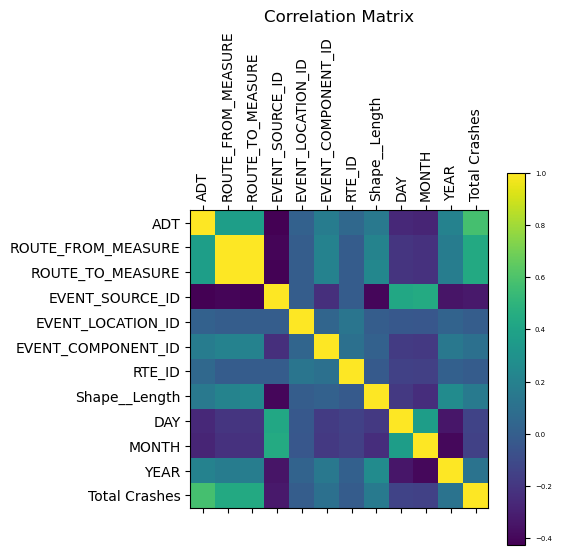

In [94]:
plt.matshow(combined_df.corr(numeric_only=True))

# plt.xticks(range(insurance.select_dtypes(['number']).shape[1]), insurance.select_dtypes(['number']).columns, fontsize=10, rotation=90)
# plt.yticks(range(insurance.select_dtypes(['number']).shape[1]), insurance.select_dtypes(['number']).columns, fontsize=10)

plt.xticks(range(combined_df.select_dtypes(['number']).shape[1]), combined_df.select_dtypes(['number']).columns, fontsize=10, rotation=90)
plt.yticks(range(combined_df.select_dtypes(['number']).shape[1]), combined_df.select_dtypes(['number']).columns, fontsize=10)

cb = plt.colorbar()
cb.ax.tick_params(labelsize=5)

plt.title('Correlation Matrix')
plt.show()

In [95]:
combined_df.describe()

ADT  ROUTE_FROM_MEASURE  ROUTE_TO_MEASURE  EVENT_SOURCE_ID  \
count  121676.000000       121679.000000     121679.000000    121679.000000   
mean     2925.920798            7.428478          7.987217    680129.689256   
std     11005.180857           36.669078         36.877296    177619.679087   
min         0.000000            0.000000          0.003000     10005.000000   
25%        90.000000            0.000000          0.140000    707568.500000   
50%       230.000000            0.000000          0.350000    737896.000000   
75%       950.000000            0.600000          1.540000    768757.500000   
max    245000.000000          508.757000        509.720000    990120.000000   

       EVENT_LOCATION_ID  EVENT_COMPONENT_ID        RTE_ID  Shape__Length  \
count      121679.000000       121679.000000  1.216790e+05  121540.000000   
mean            1.001307            1.094297  2.277990e+06    1124.899155   
std             0.037465            0.424690  1.966377e+06    1912.598596   
min             1.000000            1.000000  1.372701e+06       0.163981   
25%             1.000000            1.000000  1.638377e+06     168.474734   
50%             1.000000            1.000000  1.897503e+06     385.648988   
75%             1.000000            1.000000  2.149428e+06    1168.204195   
max             3.000000           11.000000  3.802397e+07   44742.909029   

                 DAY          MONTH           YEAR  Total Crashes  
count  121679.000000  121679.000000  121679.000000  121679.000000  
mean       11.805201       5.292006    2017.322011       0.104866  
std         9.701735       3.624305       5.096078       0.809051  
min         1.000000       1.000000    1986.000000       0.000000  
25%         1.000000       1.000000    2015.000000       0.000000  
50%        10.000000       5.000000    2018.000000       0.000000  
75%        20.000000       8.000000    2022.000000       0.000000  
max        31.000000      12.000000    2022.000000      16.000000

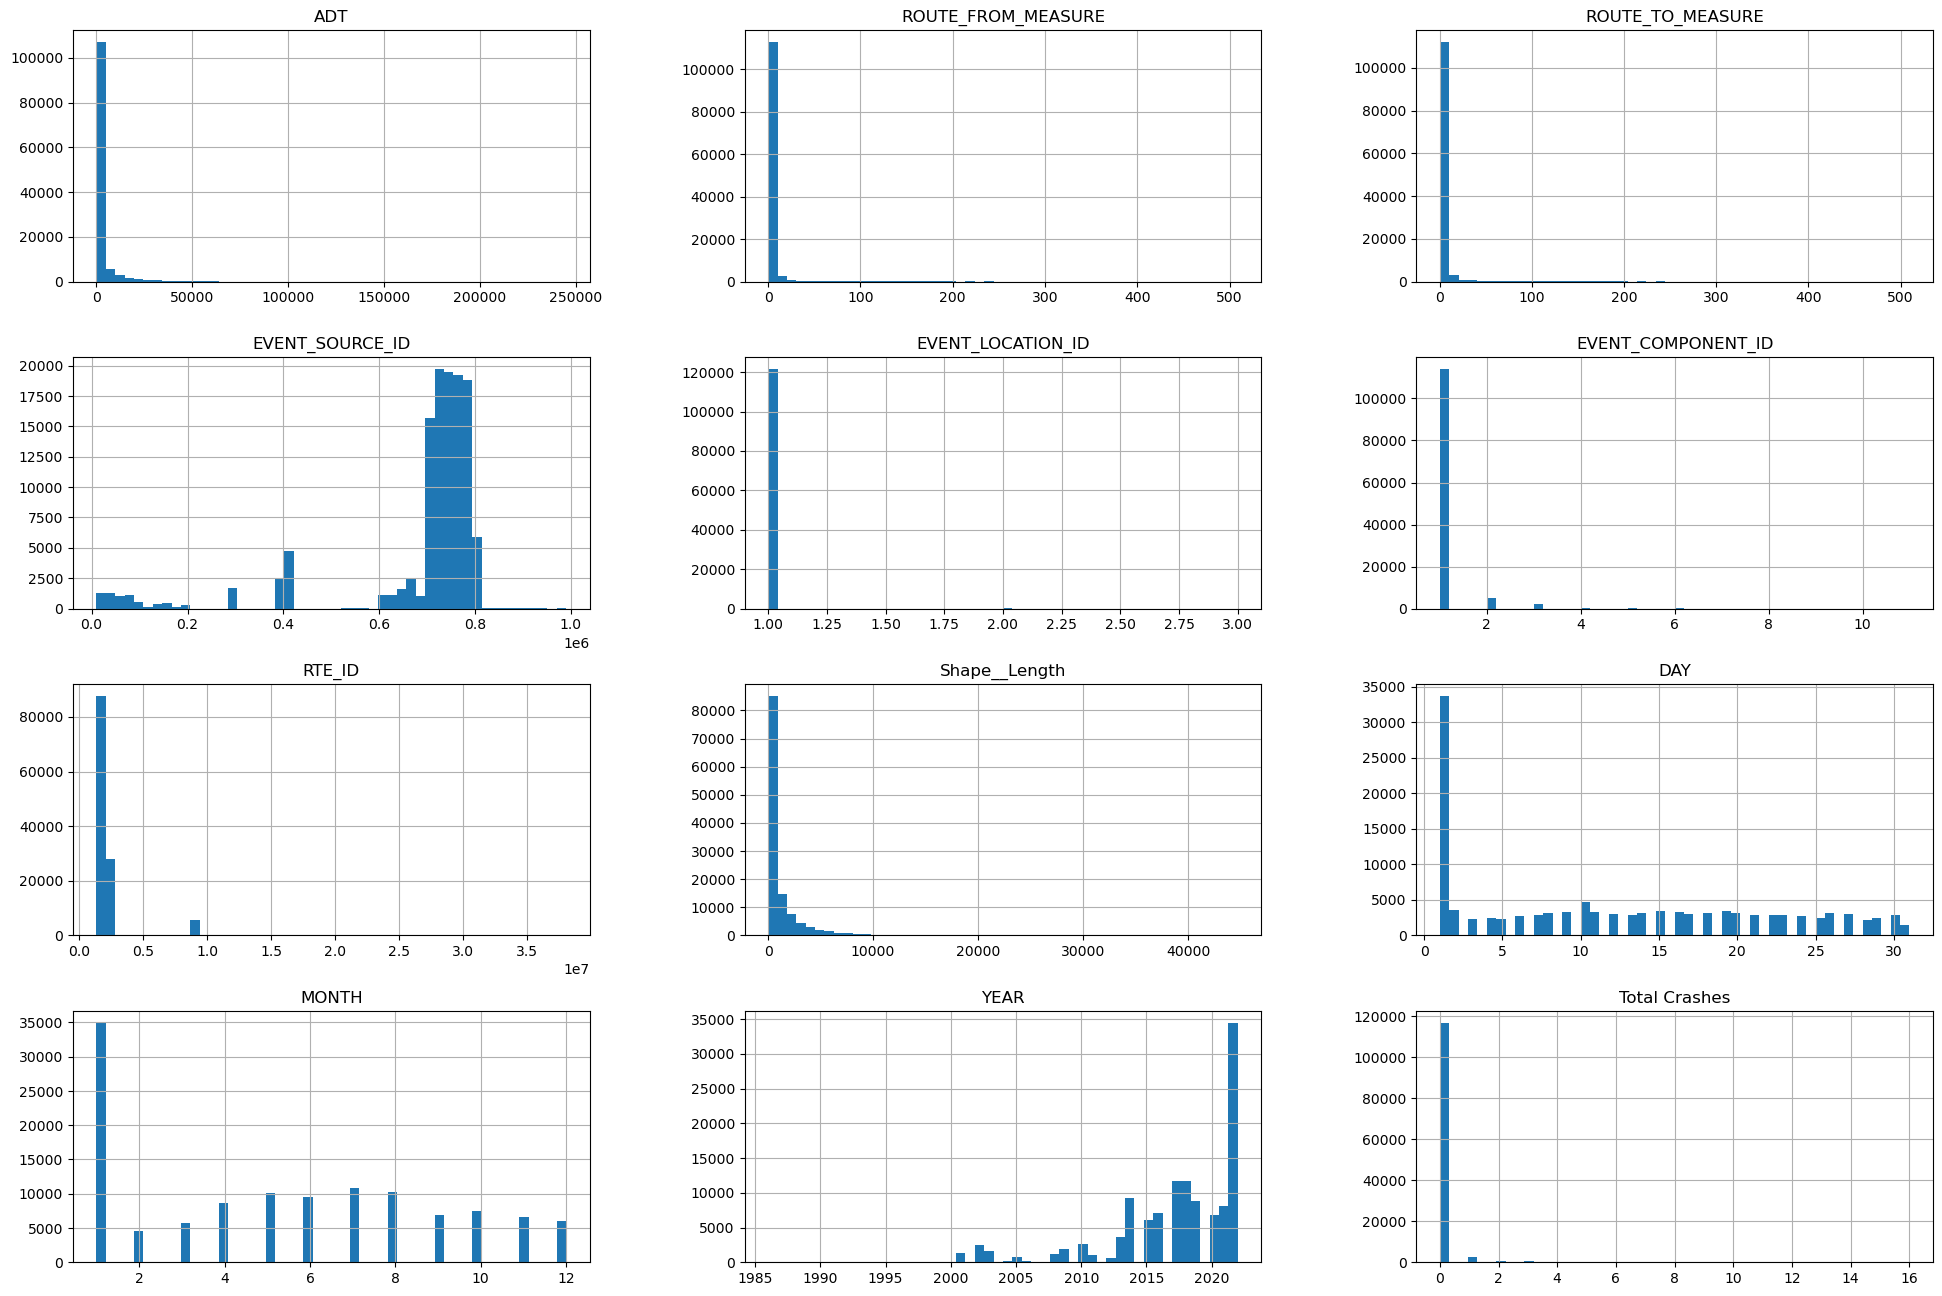

In [96]:
combined_df.hist(bins=50, figsize=(24,16))
plt.show()

<Axes: xlabel='MONTH', ylabel='ADT'>

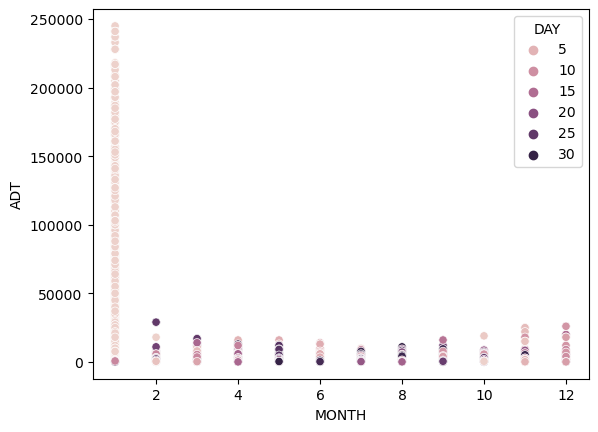

In [97]:
import seaborn as sns
sns.scatterplot(data=combined_df,x='MONTH',y='ADT', hue='DAY')

<Axes: xlabel='YEAR', ylabel='ADT'>

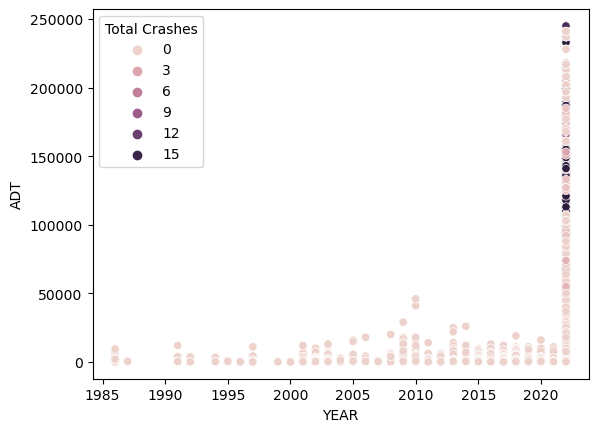

In [98]:
sns.scatterplot(data=combined_df,x='YEAR',y='ADT', hue='Total Crashes')

<Axes: xlabel='YEAR', ylabel='Total Crashes'>

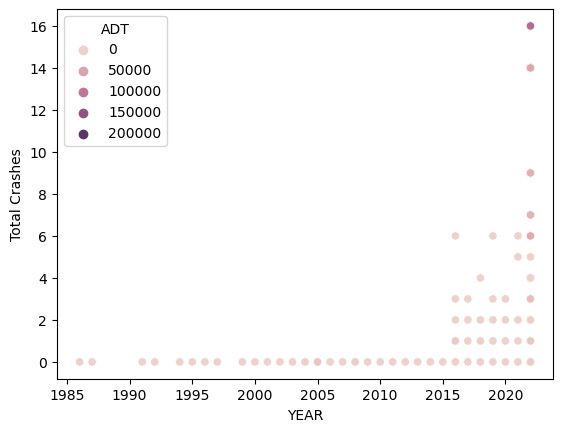

In [99]:
sns.scatterplot(data=combined_df,x='YEAR',y='Total Crashes', hue='ADT')

/root/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='ADT', ylabel='Density'>

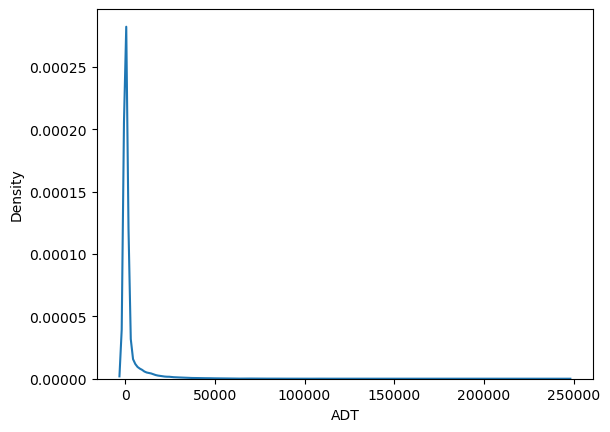

In [100]:
sns.kdeplot(combined_df['ADT']) # a lot of 0s...

/root/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/root/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


(array([1980., 1985., 1990., 1995., 2000., 2005., 2010., 2015., 2020.,
        2025.]),
 [Text(1980.0, 0, '1980'),
  Text(1985.0, 0, '1985'),
  Text(1990.0, 0, '1990'),
  Text(1995.0, 0, '1995'),
  Text(2000.0, 0, '2000'),
  Text(2005.0, 0, '2005'),
  Text(2010.0, 0, '2010'),
  Text(2015.0, 0, '2015'),
  Text(2020.0, 0, '2020'),
  Text(2025.0, 0, '2025')])

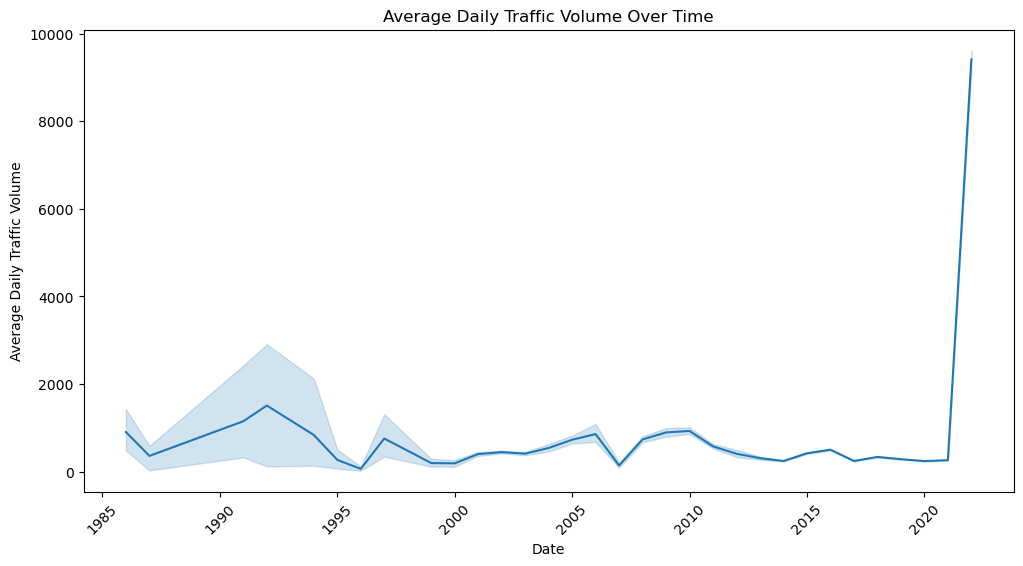

In [101]:
plt.figure(figsize=(12, 6)) 
sns.lineplot(x='YEAR', y='ADT', data=combined_df) 
plt.title('Average Daily Traffic Volume Over Time') 
plt.xlabel('Date') 
plt.ylabel('Average Daily Traffic Volume') 
plt.xticks(rotation=45)

Text(0, 0.5, 'Average Daily Traffic Volume')

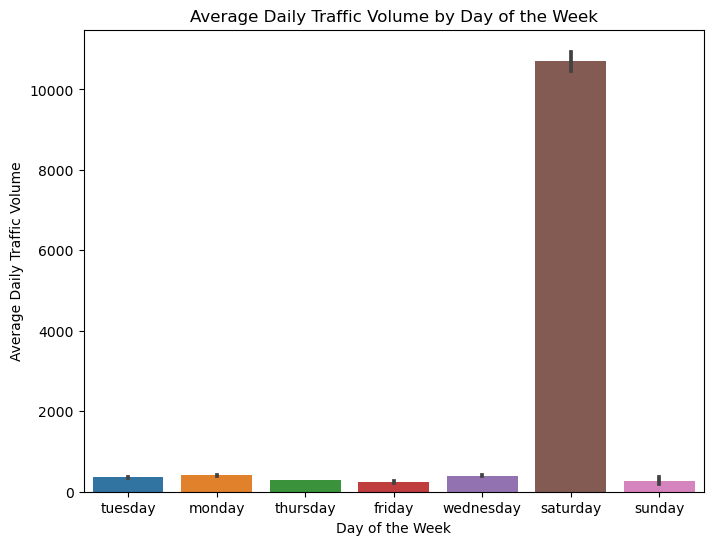

In [102]:
plt.figure(figsize=(8, 6)) 
sns.barplot(x='DAY_WEEK', y='ADT', data=combined_df) 
plt.title('Average Daily Traffic Volume by Day of the Week') 
plt.xlabel('Day of the Week') 
plt.ylabel('Average Daily Traffic Volume')

Text(0, 0.5, 'Average Daily Traffic Volume')

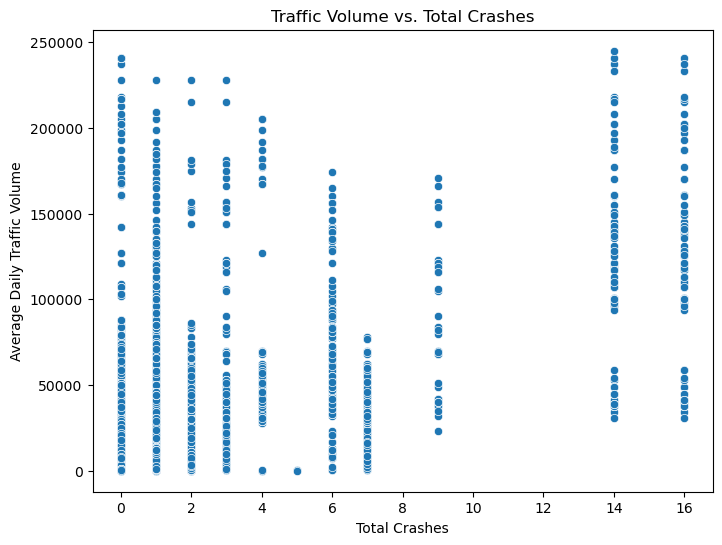

In [103]:
plt.figure(figsize=(8, 6)) 
sns.scatterplot(x='Total Crashes', y='ADT', data=combined_df) 
plt.title('Traffic Volume vs. Total Crashes') 
plt.xlabel('Total Crashes') 
plt.ylabel('Average Daily Traffic Volume')

Text(0, 0.5, 'Average Daily Traffic Volume')

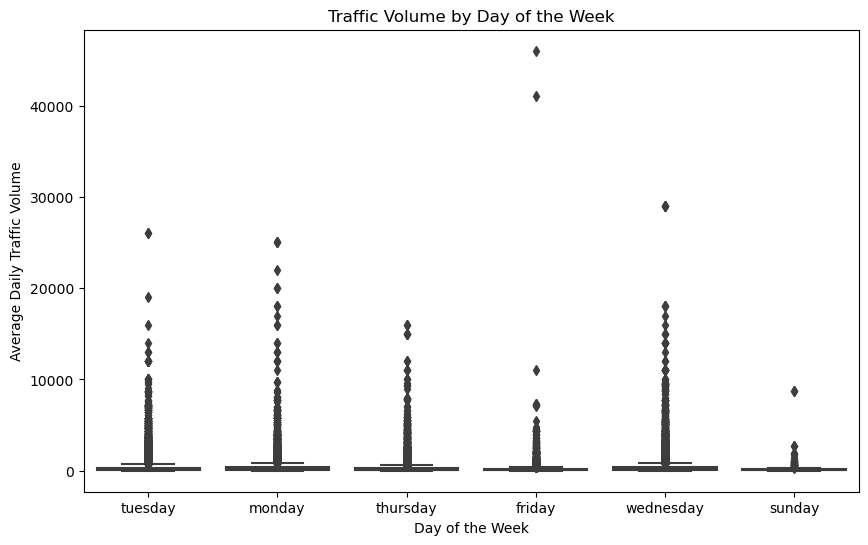

In [104]:
filtered_df = combined_df[combined_df['DAY_WEEK'] != 'saturday']
plt.figure(figsize=(10, 6)) 
sns.boxplot(x='DAY_WEEK', y='ADT', data=filtered_df) 
plt.title('Traffic Volume by Day of the Week') 
plt.xlabel('Day of the Week') 
plt.ylabel('Average Daily Traffic Volume')

Transformation and model:

In [105]:
# Pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

combined_df.dropna(subset=['ADT'], inplace=True)
combined_df = combined_df[combined_df["FROM_JURISDICTION"] != "Town of Narrows"]

train_set, test_set = train_test_split(combined_df)

train_labels = train_set["ADT"].copy()

traffic_train = train_set.drop("ADT", axis=1)

test_labels = test_set["ADT"].copy()

traffic_test = test_set.drop("ADT", axis=1)

num_attr = ["ROUTE_FROM_MEASURE","ROUTE_TO_MEASURE", "DAY", "MONTH", "YEAR", "Total Crashes", "Shape__Length"]
cat_attr = ["LOC_COMP_DIRECTIONALITY_NAME","FROM_JURISDICTION", "TO_JURISDICTION", "FROM_DISTRICT", "TO_DISTRICT","DAY_WEEK"]

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])



full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attr),
        ("cat", OneHotEncoder(), cat_attr),
    ])

traffic_prepared = full_pipeline.fit_transform(traffic_train)

print(traffic_prepared)

  (0, 0)	-0.20231194267071048
  (0, 1)	-0.1597232091665215
  (0, 2)	-1.1135977557296504
  (0, 3)	-1.1872536333715404
  (0, 4)	0.9169363823320296
  (0, 5)	-0.1298961517645661
  (0, 6)	1.6596321488133234
  (0, 7)	1.0
  (0, 130)	1.0
  (0, 314)	1.0
  (0, 387)	1.0
  (0, 397)	1.0
  (0, 401)	1.0
  (1, 0)	-0.20122869632675425
  (1, 1)	-0.21008403792240454
  (1, 2)	-0.8042616560429818
  (1, 3)	1.8501452330975734
  (1, 4)	0.3294000409942452
  (1, 5)	-0.1298961517645661
  (1, 6)	-0.3897308802497102
  (1, 7)	1.0
  (1, 77)	1.0
  (1, 261)	1.0
  (1, 384)	1.0
  (1, 394)	1.0
  :	:
  (91254, 1)	7.15264219526323
  (91254, 2)	-1.1135977557296504
  (91254, 3)	-1.1872536333715404
  (91254, 4)	0.9169363823320296
  (91254, 5)	-0.1298961517645661
  (91254, 6)	1.420070017837865
  (91254, 7)	1.0
  (91254, 130)	1.0
  (91254, 314)	1.0
  (91254, 387)	1.0
  (91254, 397)	1.0
  (91254, 401)	1.0
  (91255, 0)	-0.20231194267071048
  (91255, 1)	-0.1678024865070375
  (91255, 2)	1.361091041763698
  (91255, 3)	-0.08274495465

In [106]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

traffic_prepared.shape

# train_labels.isnull().sum()

lin_reg.fit(traffic_prepared, train_labels)

some_data = combined_df.iloc[:5]
some_labels = train_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
# Note here that you only use transform() instead of fit_tranform becausue you are not trying to learn any parameter (ie. median)
print(some_data_prepared)
print("Predictions:", lin_reg.predict(some_data_prepared))

print("Labels:", list(some_labels))

  (0, 0)	-0.20231194267071048
  (0, 1)	-0.20981472867772066
  (0, 2)	-0.4949255563563133
  (0, 3)	0.19338221502351138
  (0, 4)	-1.237363535906513
  (0, 5)	-0.1298961517645661
  (0, 6)	-0.33811607602281246
  (0, 7)	1.0
  (0, 82)	1.0
  (0, 266)	1.0
  (0, 387)	1.0
  (0, 397)	1.0
  (0, 404)	1.0
  (1, 0)	-0.18552162433938876
  (1, 1)	-0.19904235889036603
  (1, 2)	-0.18558945666964474
  (1, 3)	1.8501452330975734
  (1, 4)	0.3294000409942452
  (1, 5)	-0.1298961517645661
  (1, 6)	-0.5627437895910345
  (1, 7)	1.0
  (1, 26)	1.0
  (1, 210)	1.0
  (1, 383)	1.0
  (1, 393)	1.0
  :	:
  (3, 1)	-0.07085115842084552
  (3, 2)	1.8766512079081459
  (3, 3)	0.46950938470252174
  (3, 4)	0.52524548810684
  (3, 5)	-0.1298961517645661
  (3, 6)	2.8096275548974594
  (3, 7)	1.0
  (3, 110)	1.0
  (3, 294)	1.0
  (3, 383)	1.0
  (3, 393)	1.0
  (3, 403)	1.0
  (4, 0)	-0.14731010955633242
  (4, 1)	-0.16026182765588923
  (4, 2)	-0.4949255563563133
  (4, 3)	0.46950938470252174
  (4, 4)	-0.06229085323094433
  (4, 5)	-0.12989615

In [107]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())


X_test_prepared = full_pipeline.transform(traffic_test)
final_predictions = lin_reg.predict(X_test_prepared)

lin_mse = mean_squared_error(test_labels, final_predictions)
lin_rmse = np.sqrt(lin_mse)
print("lin_rmes:",lin_rmse)

lin_scores = cross_val_score(lin_reg, X_test_prepared, test_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

lin_rmes: 7583.679352774165
Scores: [9244.781967   7956.31485797 7338.27753869 7263.07125895 6950.12955733
 8518.48560137 7492.39614858 7364.65021408 6344.85315326 7537.8290194 ]
Mean: 7601.078931661779
Standard deviation: 769.8344185469771


visualizing results

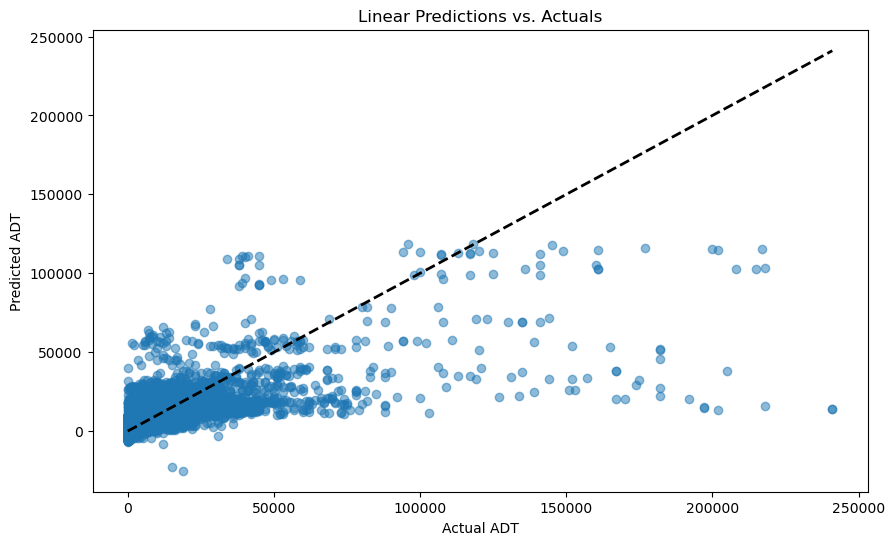

In [108]:

# Scatter plot of Predictions vs Actuals
plt.figure(figsize=(10, 6))
plt.scatter(test_labels, final_predictions, alpha=0.5)
plt.plot([test_labels.min(), test_labels.max()], [test_labels.min(), test_labels.max()], 'k--', lw=2)
plt.xlabel('Actual ADT')
plt.ylabel('Predicted ADT')
plt.title('Linear Predictions vs. Actuals')
plt.show()


In [109]:
combined_df.describe()

ADT  ROUTE_FROM_MEASURE  ROUTE_TO_MEASURE  EVENT_SOURCE_ID  \
count  121675.000000       121675.000000     121675.000000    121675.000000   
mean     2925.943119            7.427148          7.985890    680138.632776   
std     11005.223327           36.667668         36.875889    177605.406830   
min         0.000000            0.000000          0.003000     10005.000000   
25%        90.000000            0.000000          0.140000    707570.500000   
50%       230.000000            0.000000          0.350000    737897.000000   
75%       950.000000            0.600000          1.540000    768757.500000   
max    245000.000000          508.757000        509.720000    990120.000000   

       EVENT_LOCATION_ID  EVENT_COMPONENT_ID        RTE_ID  Shape__Length  \
count      121675.000000       121675.000000  1.216750e+05  121536.000000   
mean            1.001307            1.094300  2.277944e+06    1124.902013   
std             0.037466            0.424697  1.966306e+06    1912.625995   
min             1.000000            1.000000  1.372701e+06       0.163981   
25%             1.000000            1.000000  1.638377e+06     168.471225   
50%             1.000000            1.000000  1.897503e+06     385.641601   
75%             1.000000            1.000000  2.149428e+06    1168.180833   
max             3.000000           11.000000  3.802397e+07   44742.909029   

                 DAY          MONTH           YEAR  Total Crashes  
count  121675.000000  121675.000000  121675.000000  121675.000000  
mean       11.805556       5.292147    2017.321857       0.104664  
std         9.701697       3.624281       5.096091       0.807377  
min         1.000000       1.000000    1986.000000       0.000000  
25%         1.000000       1.000000    2015.000000       0.000000  
50%        10.000000       5.000000    2018.000000       0.000000  
75%        20.000000       8.000000    2022.000000       0.000000  
max        31.000000      12.000000    2022.000000      16.000000

In [110]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(traffic_prepared, train_labels)

traffic_predictions = tree_reg.predict(traffic_prepared)
tree_mse = mean_squared_error(train_labels, traffic_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

scores = cross_val_score(tree_reg, traffic_prepared, train_labels, scoring="neg_mean_squared_error", cv=5)
tree_rmse_scores = np.sqrt(-scores)

display_scores(tree_rmse_scores)

Scores: [5797.87959279 5666.47327171 6794.22742937 6154.90521123 5229.10664523]
Mean: 5928.518430068564
Standard deviation: 524.5215079970275


In [111]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    { 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
  ]

decision_reg = DecisionTreeRegressor(random_state=42)
# train across 5 folds, that's a total of 90 rounds of training
grid_search = GridSearchCV(decision_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(traffic_prepared, train_labels)

grid_search.best_params_

grid_search.best_estimator_

final_model = grid_search.best_estimator_

final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(test_labels, final_predictions)
final_rmse = np.sqrt(final_mse)

final_rmse

6725.867811468717

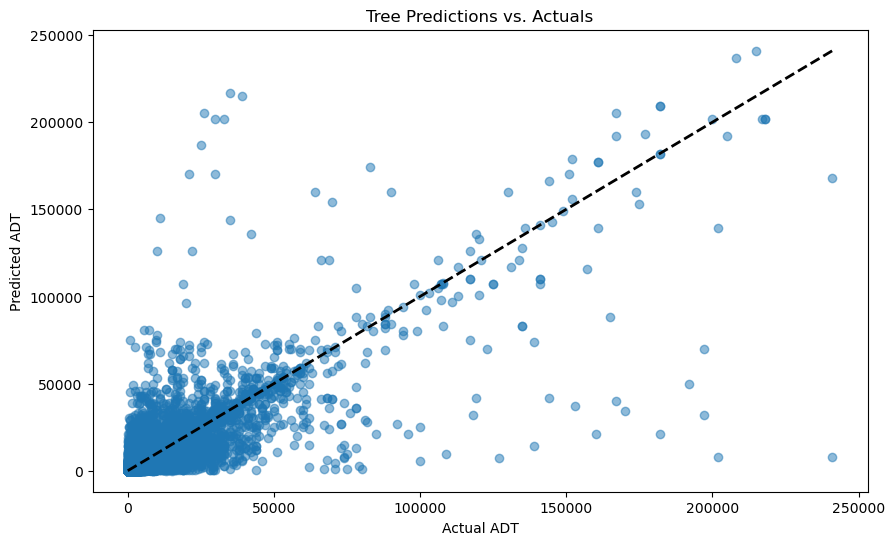

In [112]:
plt.figure(figsize=(10, 6))
plt.scatter(test_labels, final_predictions, alpha=0.5)
plt.plot([test_labels.min(), test_labels.max()], [test_labels.min(), test_labels.max()], 'k--', lw=2)
plt.xlabel('Actual ADT')
plt.ylabel('Predicted ADT')
plt.title('Tree Predictions vs. Actuals')
plt.show()

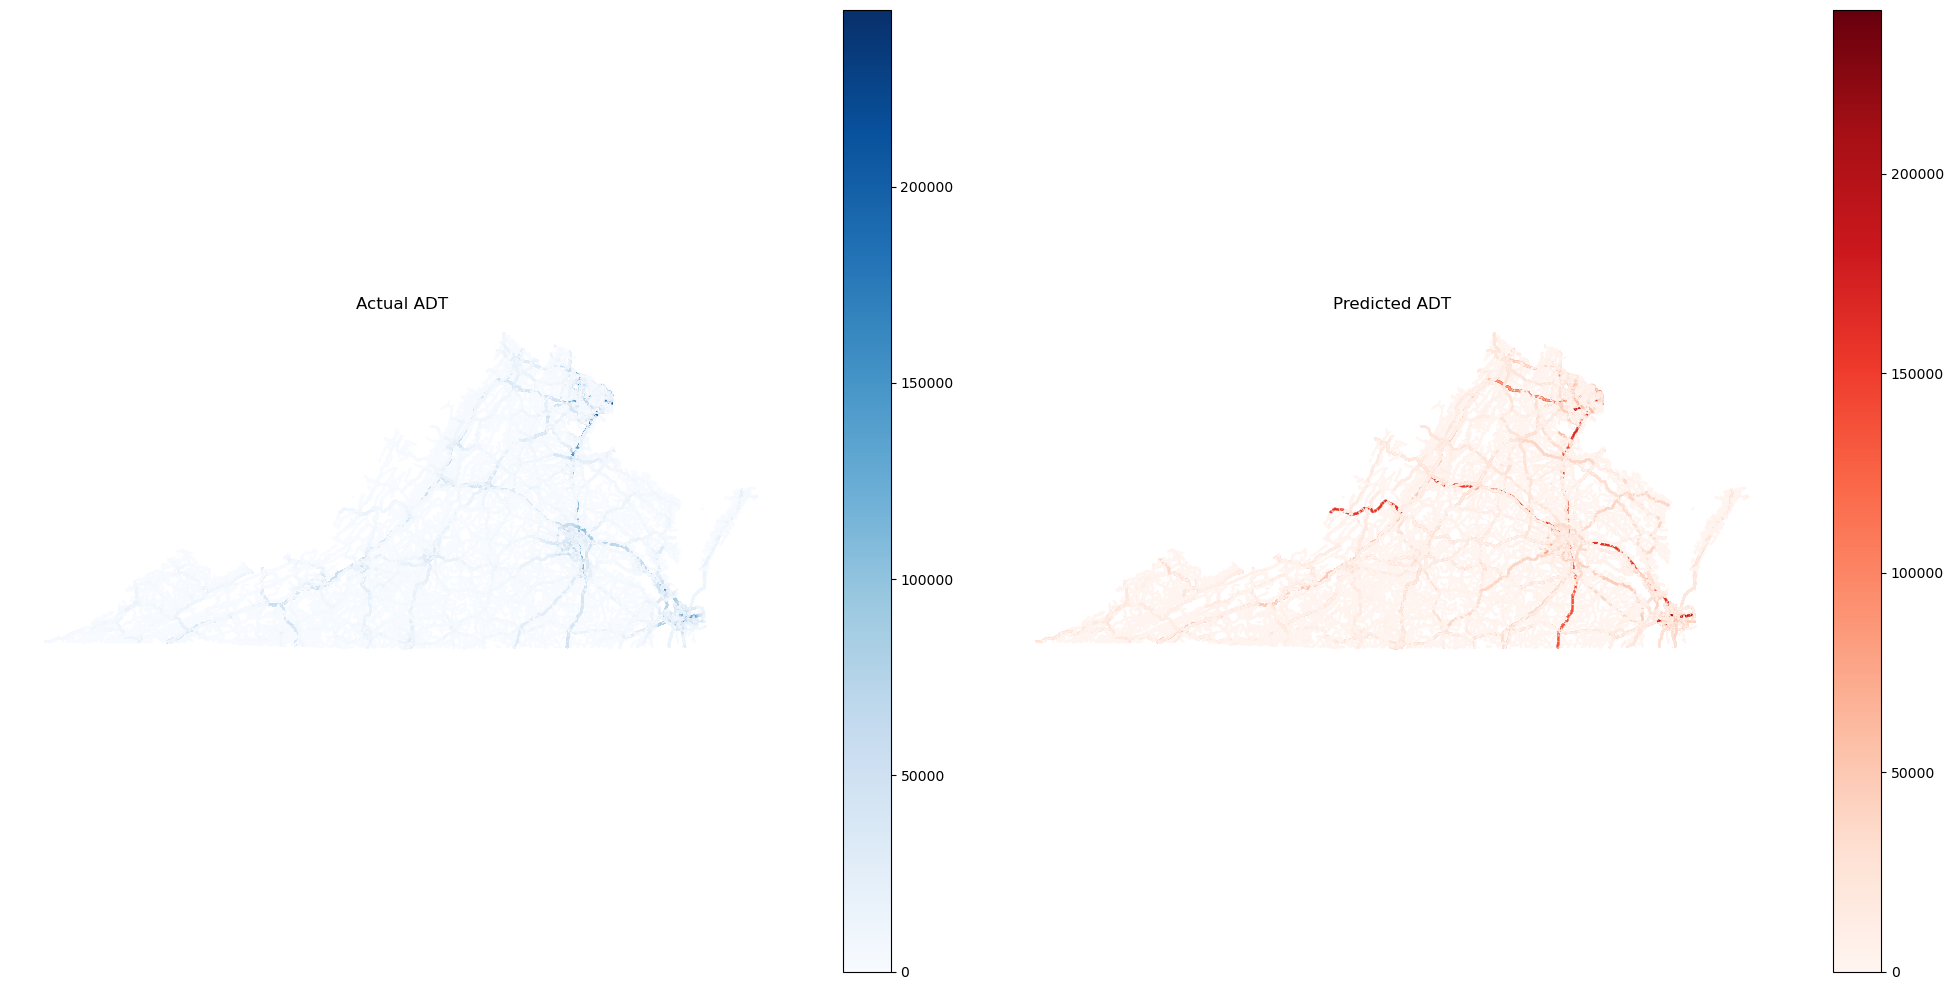

In [113]:
import geopandas as gpd
import matplotlib.pyplot as plt

geo_data = gpd.read_file('Traffic_Volume.geojson')

geo_data['RTE_ID'] = geo_data['RTE_ID'].astype(str)
test_set['RTE_ID'] = test_set['RTE_ID'].astype(str)
test_set_copy = test_set.copy() 
test_prepared = full_pipeline.transform(test_set_copy)  

test_predictions = final_model.predict(test_prepared)

test_set_copy['Predicted_ADT'] = test_predictions

geo_test_data = geo_data.merge(test_set_copy, on='RTE_ID', how='inner')

fig, ax = plt.subplots(1, 2, figsize=(20, 10))

geo_test_data.plot(column='ADT_x', cmap='Blues', legend=True, ax=ax[0])
ax[0].set_title('Actual ADT')
ax[0].axis('off') 


geo_test_data.plot(column='Predicted_ADT', cmap='Reds', legend=True, ax=ax[1])
ax[1].set_title('Predicted ADT')
ax[1].axis('off') 

plt.tight_layout()
plt.show()

In [114]:


geo_data = gpd.read_file('Traffic_Volume.geojson') 

geo_data['RTE_ID'] = geo_data['RTE_ID'].astype(str) 
combined_df['RTE_ID'] = combined_df['RTE_ID'].astype(str)
merged_data = geo_data.merge(combined_df, on='RTE_ID')
print(merged_data.head())

   OBJECTID  LINKID                 DATA_DATE            ROUTE_COMMON_NAME  \
0         1  795997 2011-06-07 04:00:00+00:00  SC-1538E (Frederick County)   
1         2  709217 2019-12-10 05:00:00+00:00   SC-1132E (Campbell County)   
2         2  709217 2019-12-10 05:00:00+00:00   SC-1132E (Campbell County)   
3         2  709217 2019-12-10 05:00:00+00:00   SC-1132E (Campbell County)   
4         2  709217 2019-12-10 05:00:00+00:00   SC-1132E (Campbell County)   

         ROUTE_NAME        HTRIS_ID ROUTE_ALIAS                  START_LABEL  \
0  R-VA034SC01538EB    3401538                    34-781 Prince Frederick Dr   
1  R-VA015SC01132EB    1501132                   0.08 ME SR 40 Wickliffe Ave   
2  R-VA015SC01132EB    1501132                   0.08 ME SR 40 Wickliffe Ave   
3  R-VA015SC01132EB    1501132                   0.08 ME SR 40 Wickliffe Ave   
4  R-VA015SC01132EB    1501132                   0.08 ME SR 40 Wickliffe Ave   

              END_LABEL  ADT_x  ... EVENT_COMPONEN

In [115]:
merged_data.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1137735 entries, 0 to 1137734
Data columns (total 61 columns):
 #   Column                          Non-Null Count    Dtype              
---  ------                          --------------    -----              
 0   OBJECTID                        1137735 non-null  int32              
 1   LINKID                          1137735 non-null  object             
 2   DATA_DATE                       1137735 non-null  datetime64[ms, UTC]
 3   ROUTE_COMMON_NAME               1137735 non-null  object             
 4   ROUTE_NAME                      1137735 non-null  object             
 5   HTRIS_ID                        1135976 non-null  object             
 6   ROUTE_ALIAS                     1137735 non-null  object             
 7   START_LABEL                     1137735 non-null  object             
 8   END_LABEL                       1137735 non-null  object             
 9   ADT_x                           1137597 non-null 

In [116]:
missing_geometries = geo_data[geo_data['geometry'].isnull()]
print(missing_geometries)
geo_data = geo_data.dropna(subset=['geometry'])

        OBJECTID  LINKID                 DATA_DATE  \
4625        4626  627030 2022-01-01 05:00:00+00:00   
20470      20471  400926 2022-01-01 05:00:00+00:00   
30245      30246  631060 2022-01-01 05:00:00+00:00   
30645      30646  631008 2022-01-01 05:00:00+00:00   
37200      37201  665596 2022-01-01 05:00:00+00:00   
...          ...     ...                       ...   
115456    115457  613222 2022-01-01 05:00:00+00:00   
116533    116534  665450 2022-01-01 05:00:00+00:00   
116623    116624  665449 2022-01-01 05:00:00+00:00   
117253    117254  665591 2022-01-01 05:00:00+00:00   
117343    117344  613223 2022-01-01 05:00:00+00:00   

                              ROUTE_COMMON_NAME              ROUTE_NAME  \
4625                                    VA-236W        R-VA   SR00236WB   
20470                  SC-617S (Fairfax County)        R-VA029SC00617SB   
30245     BUS US-17S (2 City of Fredericksburg)  R-VA   US00017SBBUS002   
30645     BUS US-17S (2 City of Fredericksburg)  R-

   OBJECTID  LINKID                 DATA_DATE            ROUTE_COMMON_NAME  \
0         1  795997 2011-06-07 04:00:00+00:00  SC-1538E (Frederick County)   
1         2  709217 2019-12-10 05:00:00+00:00   SC-1132E (Campbell County)   
2         2  709217 2019-12-10 05:00:00+00:00   SC-1132E (Campbell County)   
3         2  709217 2019-12-10 05:00:00+00:00   SC-1132E (Campbell County)   
4         2  709217 2019-12-10 05:00:00+00:00   SC-1132E (Campbell County)   

         ROUTE_NAME        HTRIS_ID ROUTE_ALIAS                  START_LABEL  \
0  R-VA034SC01538EB    3401538                    34-781 Prince Frederick Dr   
1  R-VA015SC01132EB    1501132                   0.08 ME SR 40 Wickliffe Ave   
2  R-VA015SC01132EB    1501132                   0.08 ME SR 40 Wickliffe Ave   
3  R-VA015SC01132EB    1501132                   0.08 ME SR 40 Wickliffe Ave   
4  R-VA015SC01132EB    1501132                   0.08 ME SR 40 Wickliffe Ave   

              END_LABEL  ADT_x  ... EVENT_COMPONEN

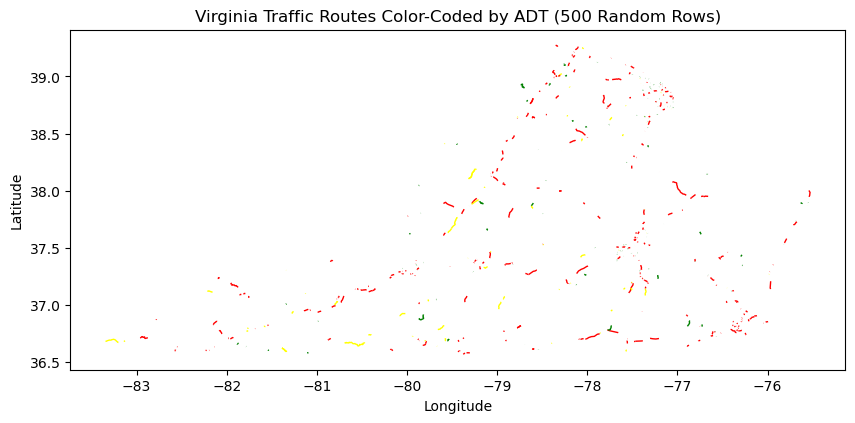

In [117]:

geo_data = gpd.read_file('Traffic_Volume.geojson')

geo_data['RTE_ID'] = geo_data['RTE_ID'].astype(str)
combined_df['RTE_ID'] = combined_df['RTE_ID'].astype(str)

merged_data = geo_data.merge(combined_df, on='RTE_ID', how='inner') 


print(merged_data.head())


sampled_data = merged_data.sample(n=500, random_state=42)  


def get_adt_color(adt):
    if adt < 500:
        return 'green'
    elif 500 <= adt < 5000:
        return 'yellow'
    else:
        return 'red'


sampled_data['color'] = sampled_data['ADT_x'].apply(get_adt_color)


fig, ax = plt.subplots(figsize=(10, 10))


sampled_data.plot(ax=ax, color=sampled_data['color'], linewidth=1)


ax.set_title('Virginia Traffic Routes Color-Coded by ADT (500 Random Rows)')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

plt.show()




Number of routes with ADT > 50,000: 71595


/root/anaconda3/lib/python3.11/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


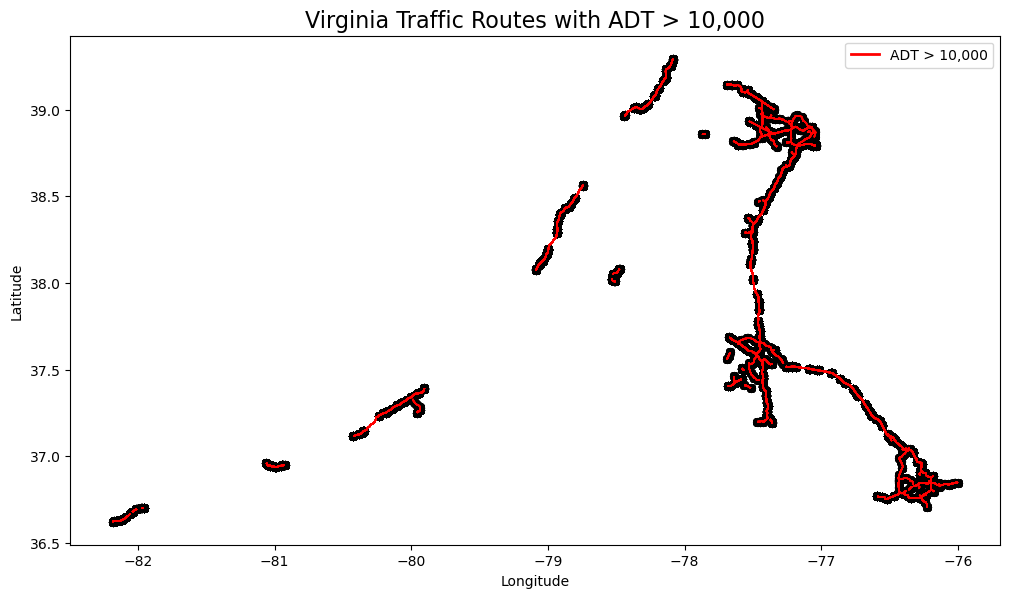

In [118]:

high_adt_data = merged_data[merged_data['ADT_x'] > 50000]


print(f"Number of routes with ADT > 50,000: {len(high_adt_data)}")


def get_high_adt_color(adt):
    return 'red'  


high_adt_data['color'] = high_adt_data['ADT_x'].apply(get_high_adt_color)

fig, ax = plt.subplots(figsize=(12, 12))

high_adt_data.boundary.plot(ax=ax, color='black', linewidth=0.5, alpha=0.5)

high_adt_data.plot(ax=ax, color=high_adt_data['color'], linewidth=1)

ax.set_title('Virginia Traffic Routes with ADT > 10,000', fontsize=16)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

import matplotlib.lines as mlines
legend_line = mlines.Line2D([], [], color='red', linewidth=2, label='ADT > 10,000')
ax.legend(handles=[legend_line], loc='upper right')

plt.show()



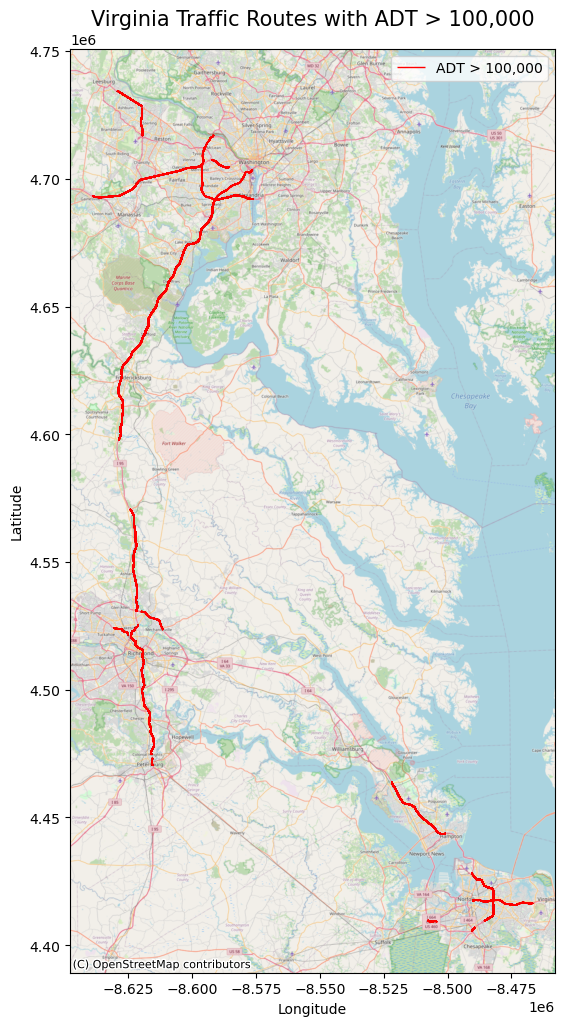

In [119]:


import contextily as ctx



high_adt_data = merged_data[merged_data['ADT_x'] > 100000]

high_adt_data = high_adt_data.to_crs(epsg=3857) 

fig, ax = plt.subplots(figsize=(12, 12))

high_adt_data.plot(
    ax=ax,
    color='red',
    linewidth=1,
    label='ADT > 100,000'
)

ctx.add_basemap(
    ax,
    source=ctx.providers.OpenStreetMap.Mapnik,  
    zoom=10
)

ax.set_title('Virginia Traffic Routes with ADT > 100,000', fontsize=15)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.legend()

plt.show()



ConnectionError: HTTPSConnectionPool(host='tile.openstreetmap.org', port=443): Max retries exceeded with url: /10/286/390.png (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x7f2b8ff65cd0>: Failed to establish a new connection: [Errno 101] Network is unreachable'))

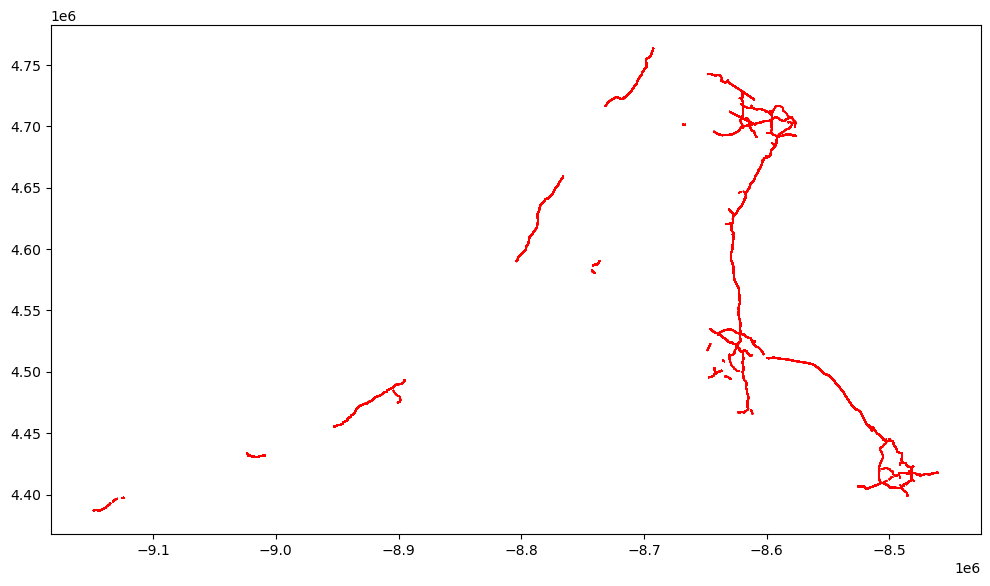

In [120]:

high_adt_data = merged_data[merged_data['ADT_x'] > 50000]

high_adt_data = high_adt_data.to_crs(epsg=3857)  

fig, ax = plt.subplots(figsize=(12, 12))

high_adt_data.plot(
    ax=ax,
    color='red',
    linewidth=1,
    label='ADT > 50,000'
)


ctx.add_basemap(
    ax,
    source=ctx.providers.OpenStreetMap.Mapnik,  
    zoom=10
)

ax.set_title('Virginia Traffic Routes with ADT > 50,000', fontsize=15)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.legend()

plt.show()



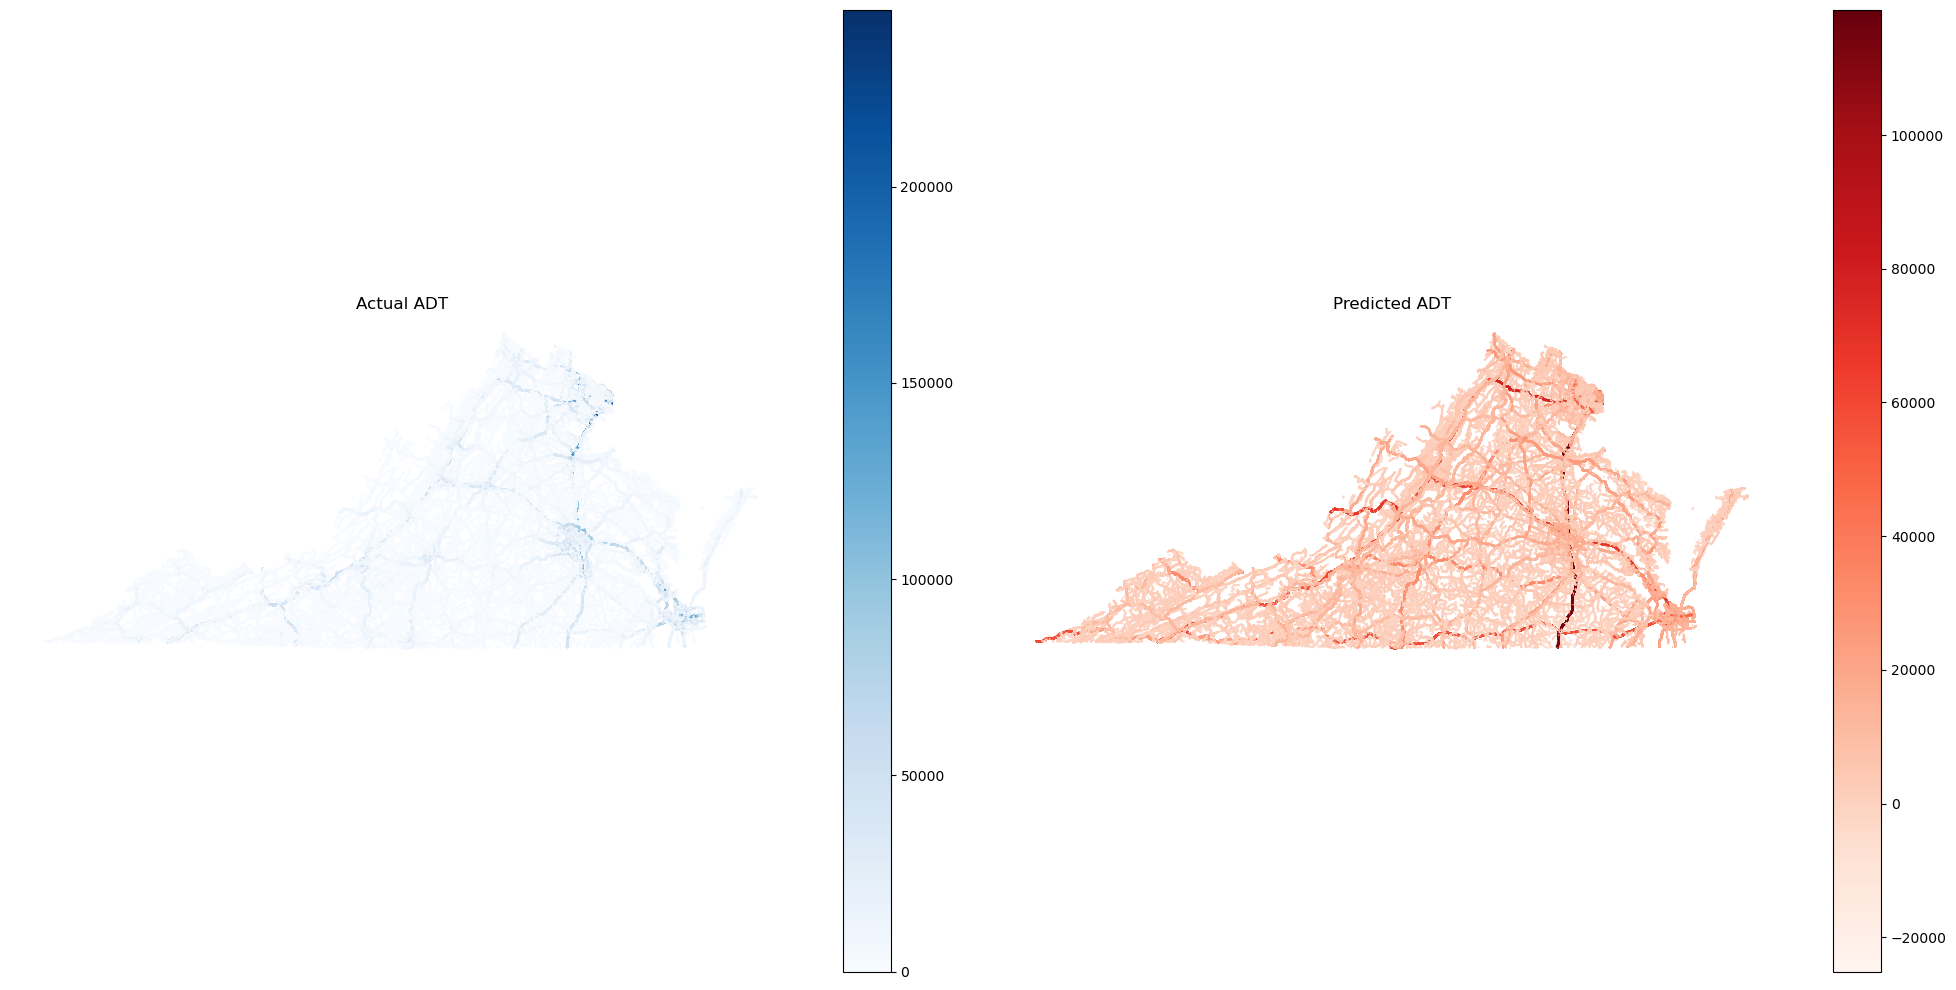

In [121]:
import geopandas as gpd
import matplotlib.pyplot as plt

geo_data = gpd.read_file('Traffic_Volume.geojson')

geo_data['RTE_ID'] = geo_data['RTE_ID'].astype(str)
test_set['RTE_ID'] = test_set['RTE_ID'].astype(str)
test_set_copy = test_set.copy() 
test_prepared = full_pipeline.transform(test_set_copy)  

test_predictions = lin_reg.predict(test_prepared)

test_set_copy['Predicted_ADT'] = test_predictions

geo_test_data = geo_data.merge(test_set_copy, on='RTE_ID', how='inner')

fig, ax = plt.subplots(1, 2, figsize=(20, 10))

geo_test_data.plot(column='ADT_x', cmap='Blues', legend=True, ax=ax[0])
ax[0].set_title('Actual ADT')
ax[0].axis('off') 


geo_test_data.plot(column='Predicted_ADT', cmap='Reds', legend=True, ax=ax[1])
ax[1].set_title('Predicted ADT')
ax[1].axis('off') 

plt.tight_layout()
plt.show()


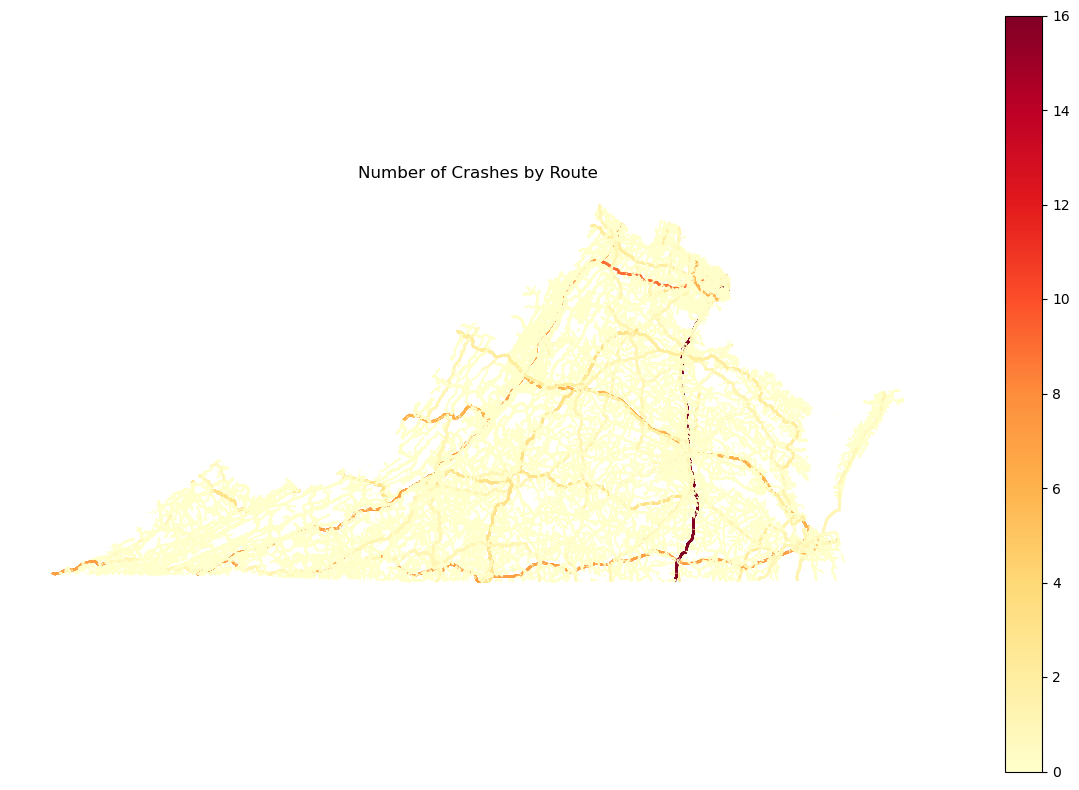

In [ ]:

import matplotlib.pyplot as plt

geo_data = gpd.read_file('Traffic_Volume.geojson')

geo_data['RTE_ID'] = geo_data['RTE_ID'].astype(str)
test_set['RTE_ID'] = test_set['RTE_ID'].astype(str)


geo_test_data = geo_data.merge(test_set, on='RTE_ID', how='inner')

fig, ax = plt.subplots(1, 1, figsize=(12, 8))

geo_test_data.plot(column='Total Crashes', cmap='YlOrRd', legend=True, ax=ax)

ax.set_title('Number of Crashes by Route')
ax.axis('off')

plt.tight_layout()
plt.show()


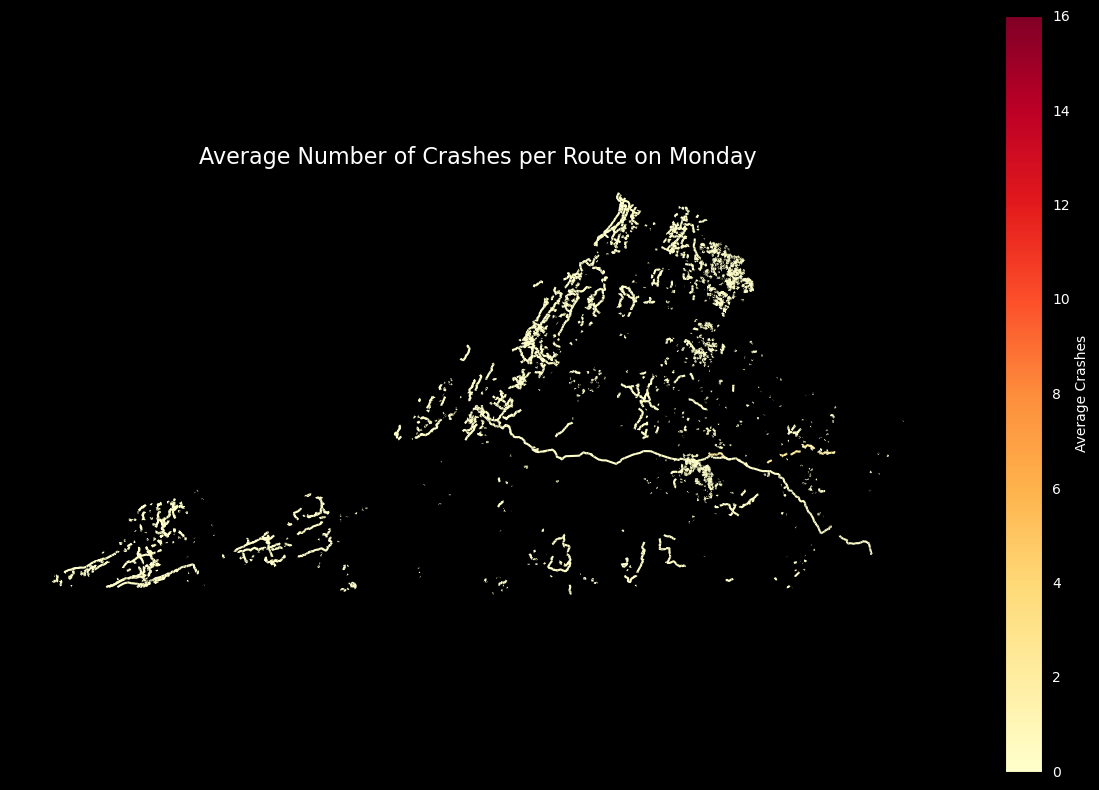

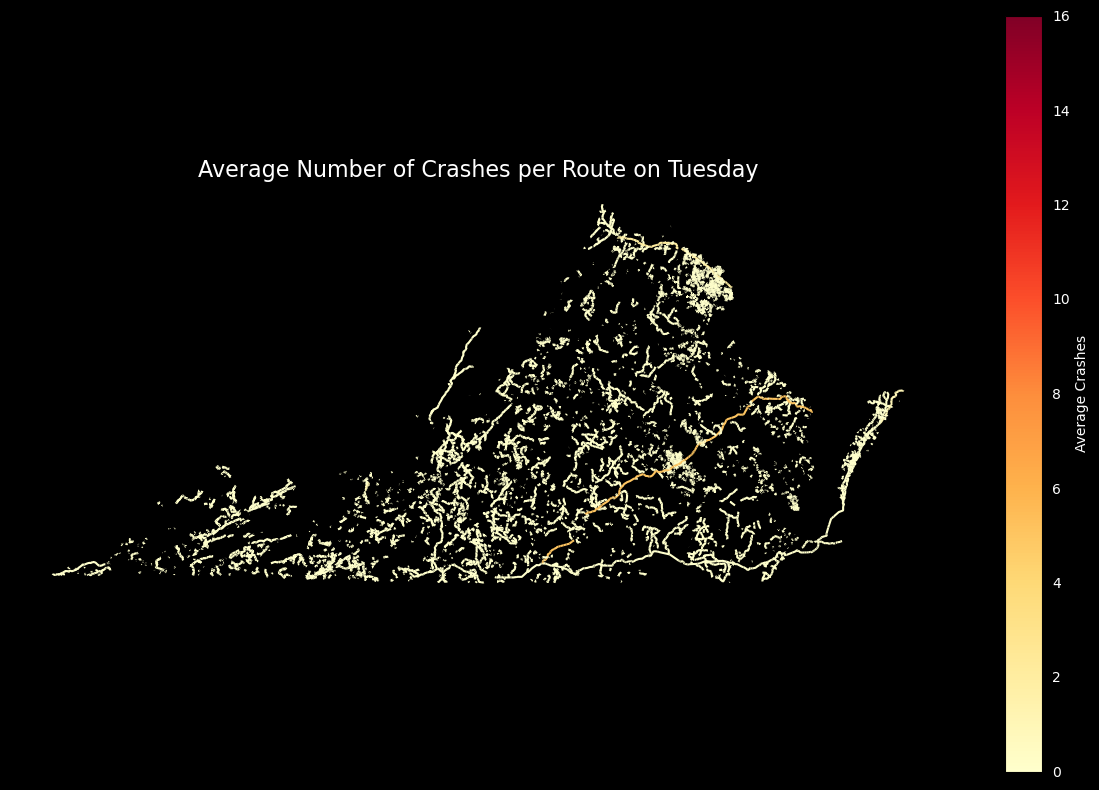

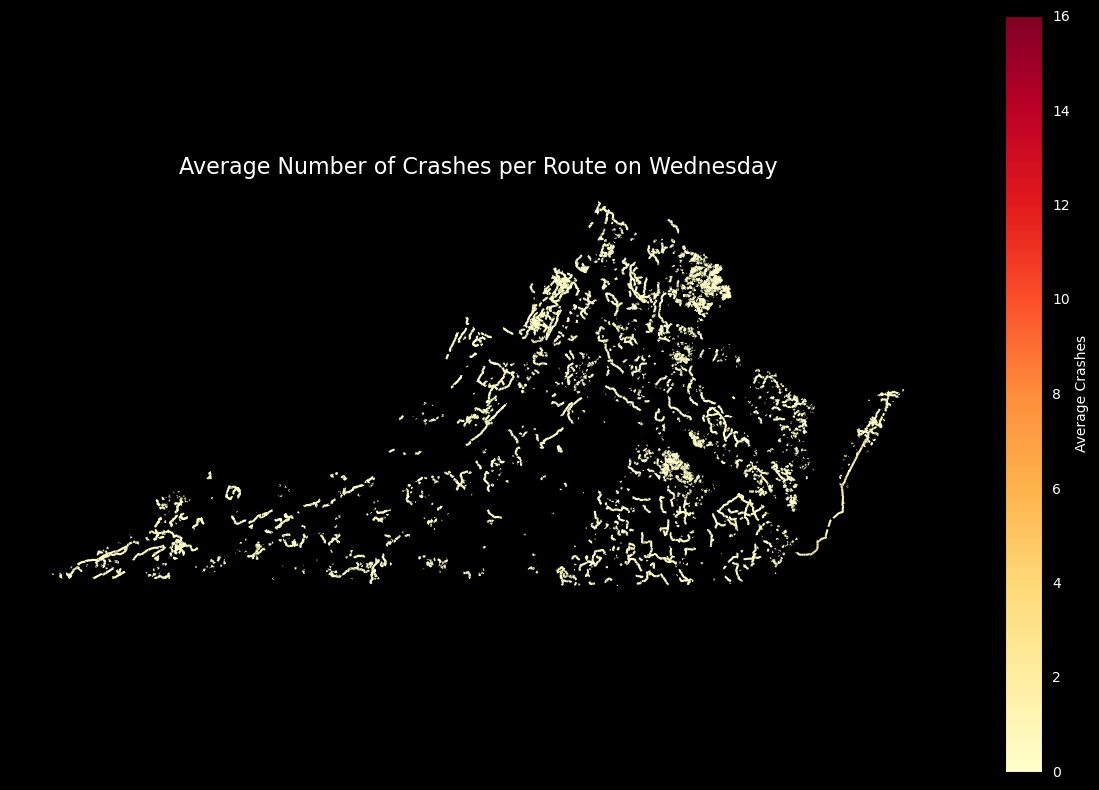

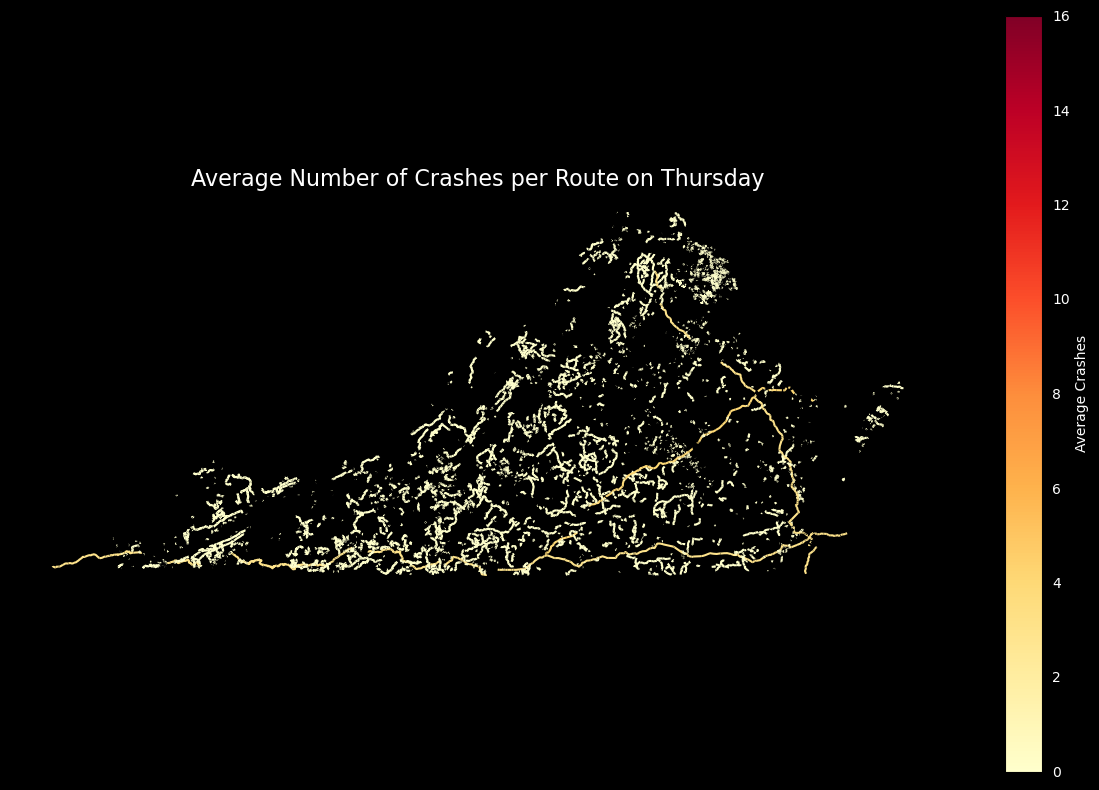

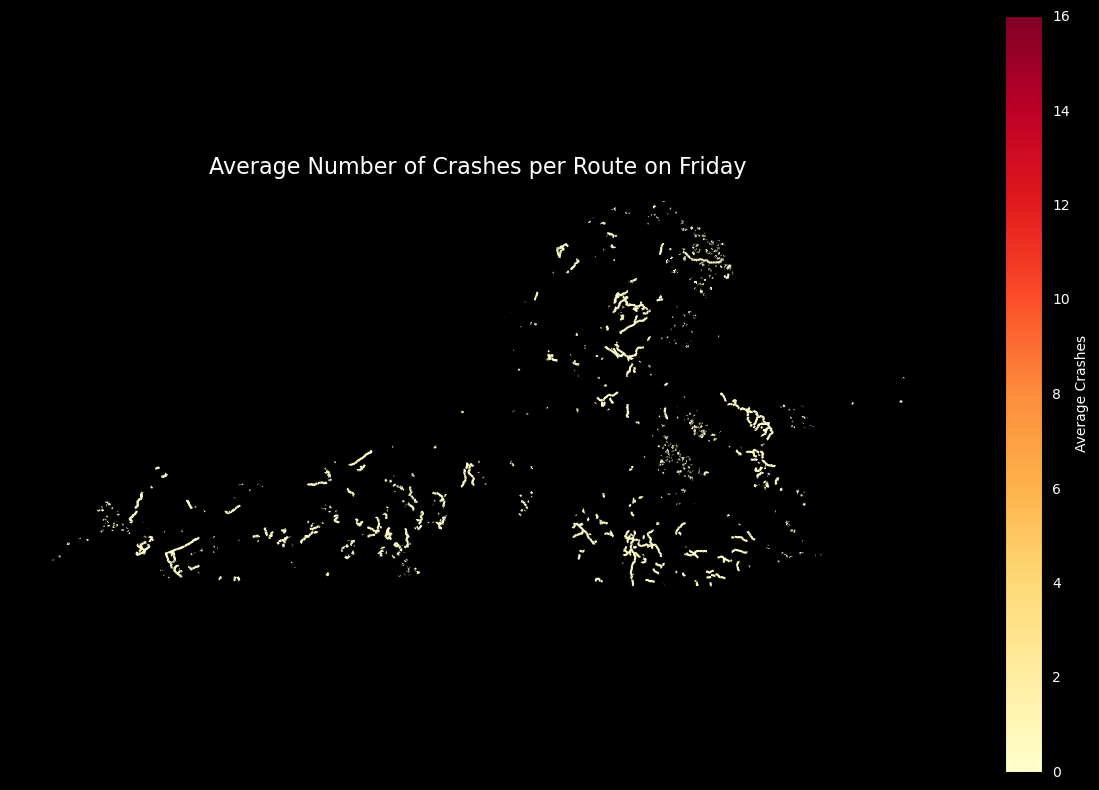

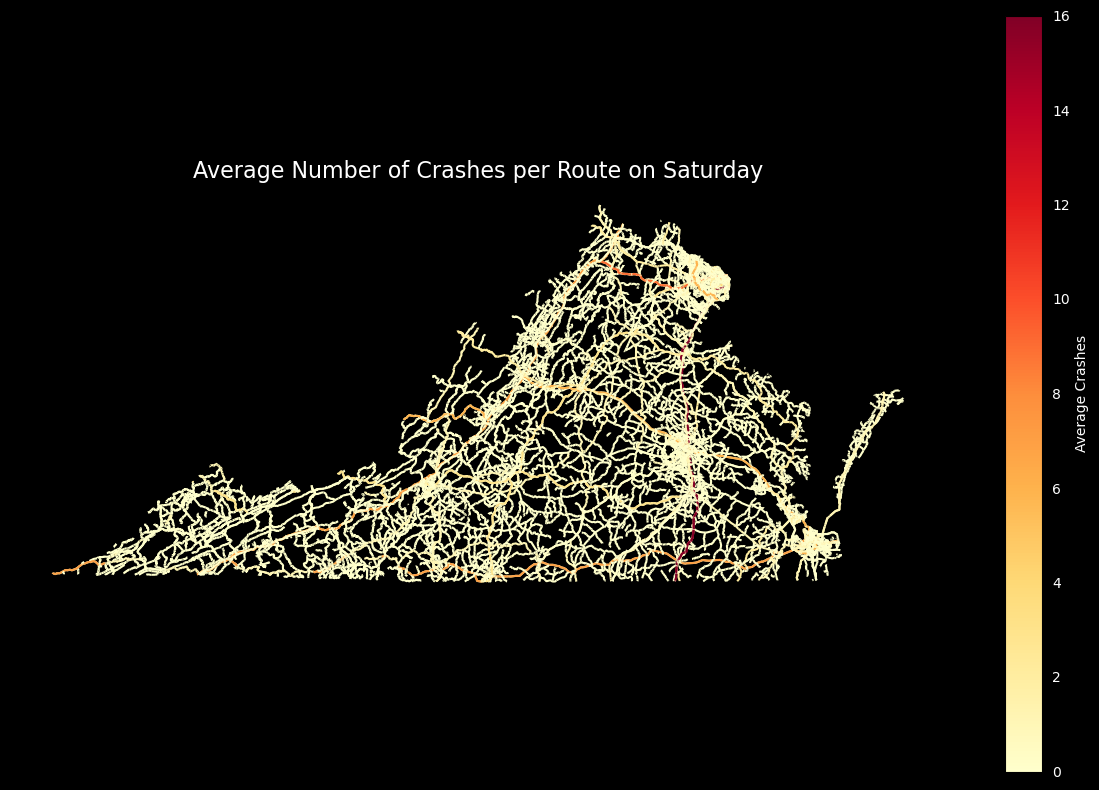

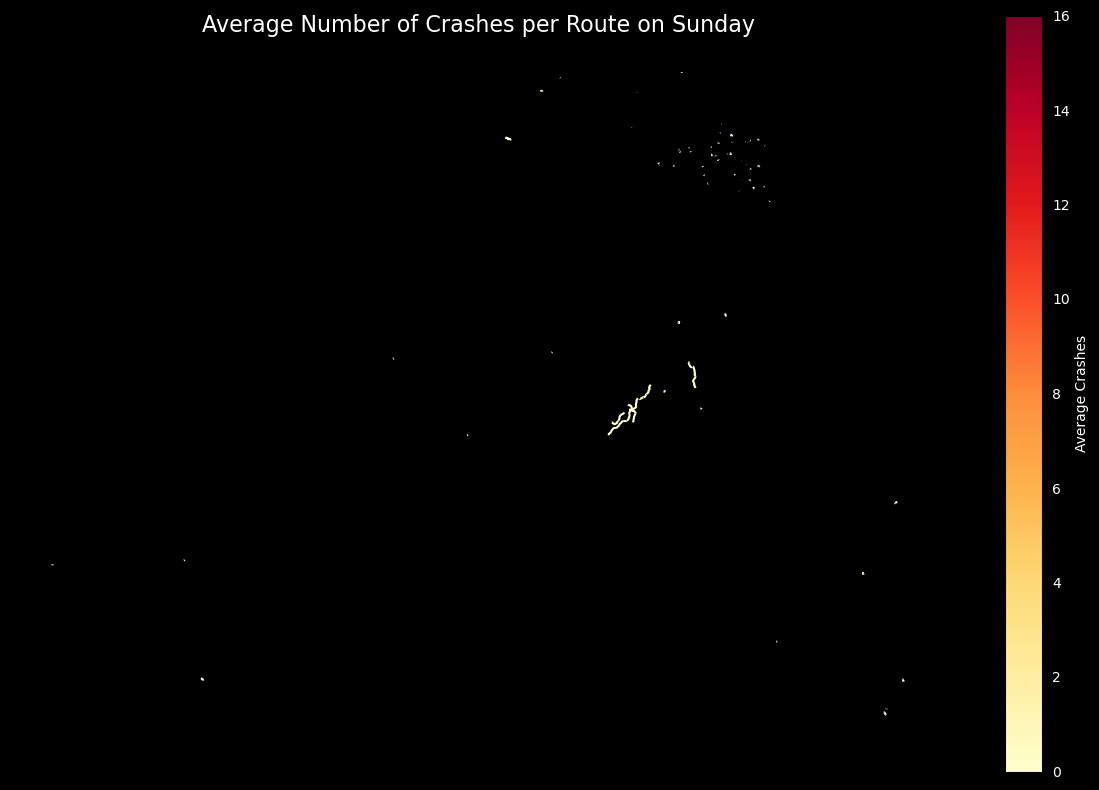

In [129]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Ensure 'RTE_ID' columns are strings for merging
geo_data['RTE_ID'] = geo_data['RTE_ID'].astype(str)
test_set['RTE_ID'] = test_set['RTE_ID'].astype(str)

# Merge datasets on 'RTE_ID'
geo_test_data = geo_data.merge(test_set, on='RTE_ID', how='inner')

# Calculate global min and max for Total Crashes across all days
global_min = geo_test_data['Total Crashes'].min()
global_max = geo_test_data['Total Crashes'].max()

# List of days of the week
DAY_WEEK = ['monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday']

# Loop through each day
for day in DAY_WEEK:
    # Filter data for the current day
    day_data = geo_test_data[geo_test_data['DAY_WEEK'] == day]
    
    # Compute average crashes per route
    day_avg_data = day_data.groupby('RTE_ID', as_index=False)['Total Crashes'].mean()
    
    # Merge average data back into GeoDataFrame
    day_avg_geo = geo_data.merge(day_avg_data, on='RTE_ID', how='inner')
    
    # Plot the data
    fig, ax = plt.subplots(1, 1, figsize=(12, 8))
    
    # Set the figure background color to black
    fig.patch.set_facecolor('black')
    
    # Plot the GeoDataFrame with a legend, using consistent vmin and vmax
    plot = day_avg_geo.plot(
        column='Total Crashes',
        cmap='YlOrRd',
        legend=True,
        ax=ax,
        vmin=global_min,  # Use global min for color scale
        vmax=global_max,  # Use global max for color scale
        legend_kwds={'label': "Average Crashes", 'orientation': "vertical"}
    )
    
    # Access the legend directly from the figure
    legend = plot.get_figure().axes[-1]  # The legend axis is usually the last one
    legend.set_facecolor('white')       # Set the legend background color to white
    legend.tick_params(colors='black')  # Ensure tick labels are black for readability
    legend.yaxis.label.set_color('white')  # Set the legend label color to white
    for text in legend.get_yticklabels():  # Set the tick label color
        text.set_color('white')
    
    # Set title and aesthetics
    ax.set_title(f'Average Number of Crashes per Route on {day.capitalize()}', color='white', fontsize=16)
    ax.axis('off')  # Turn off axes
    ax.set_facecolor('black')  # Set the axes background color to black
    
    plt.tight_layout()
    plt.show()


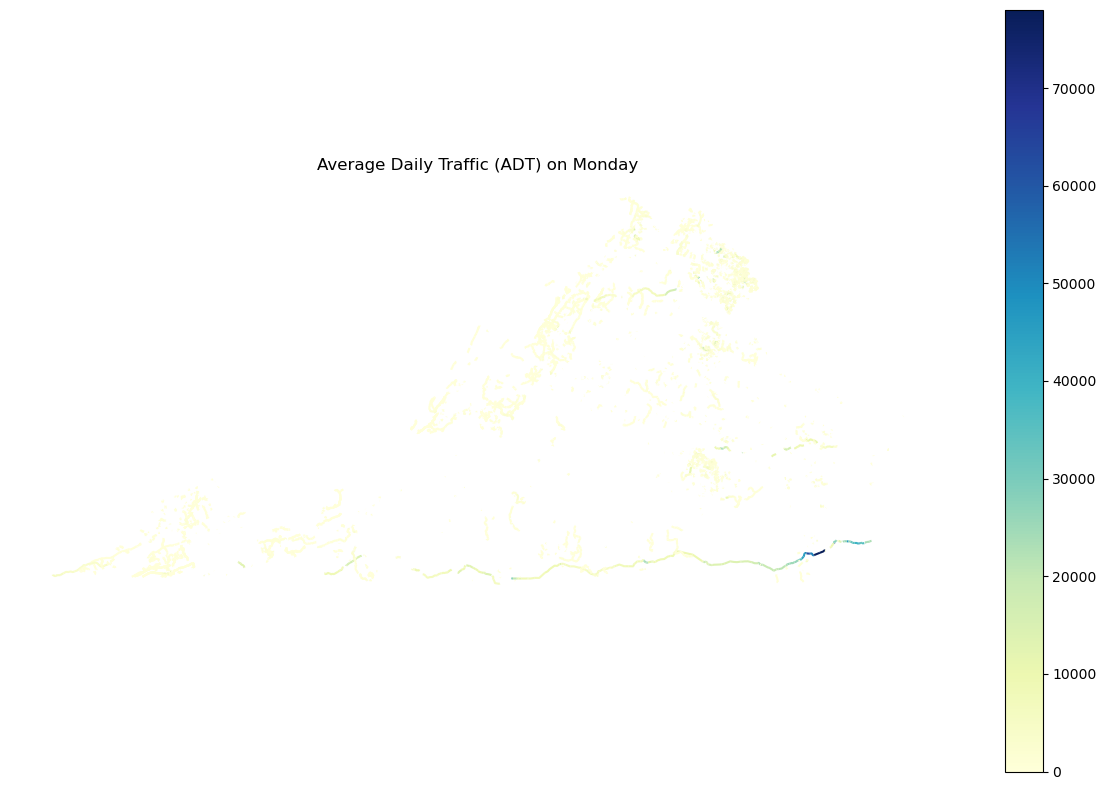

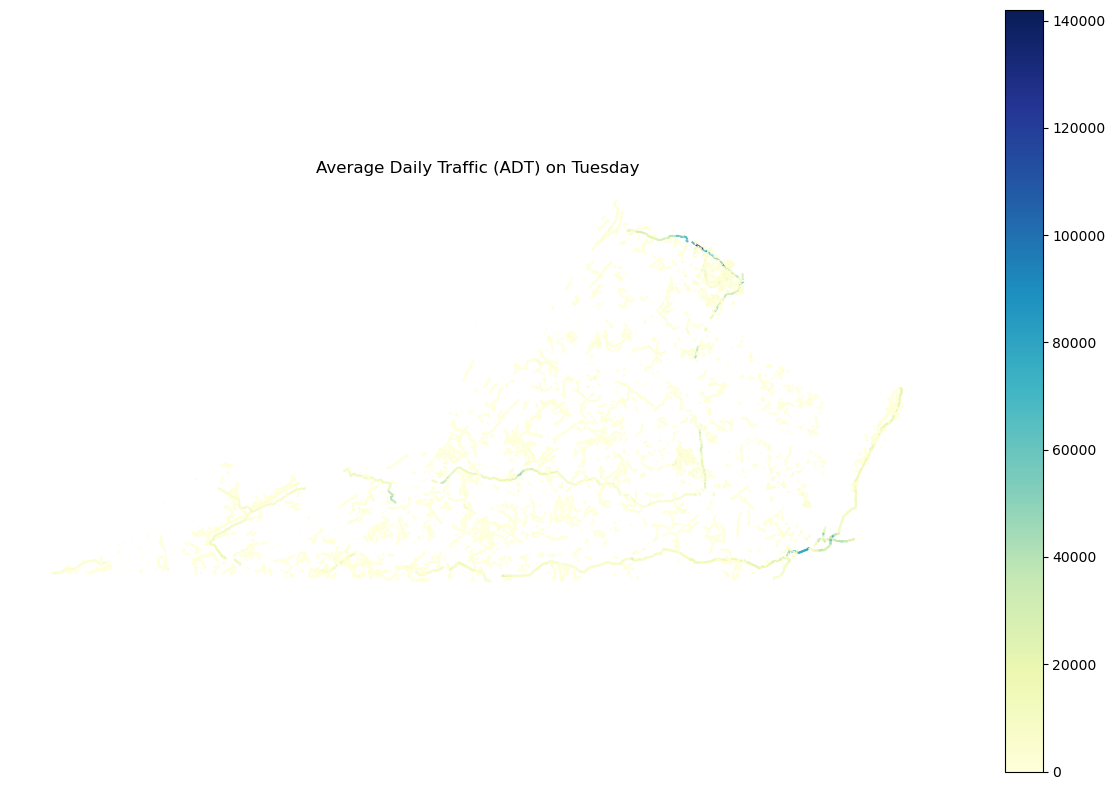

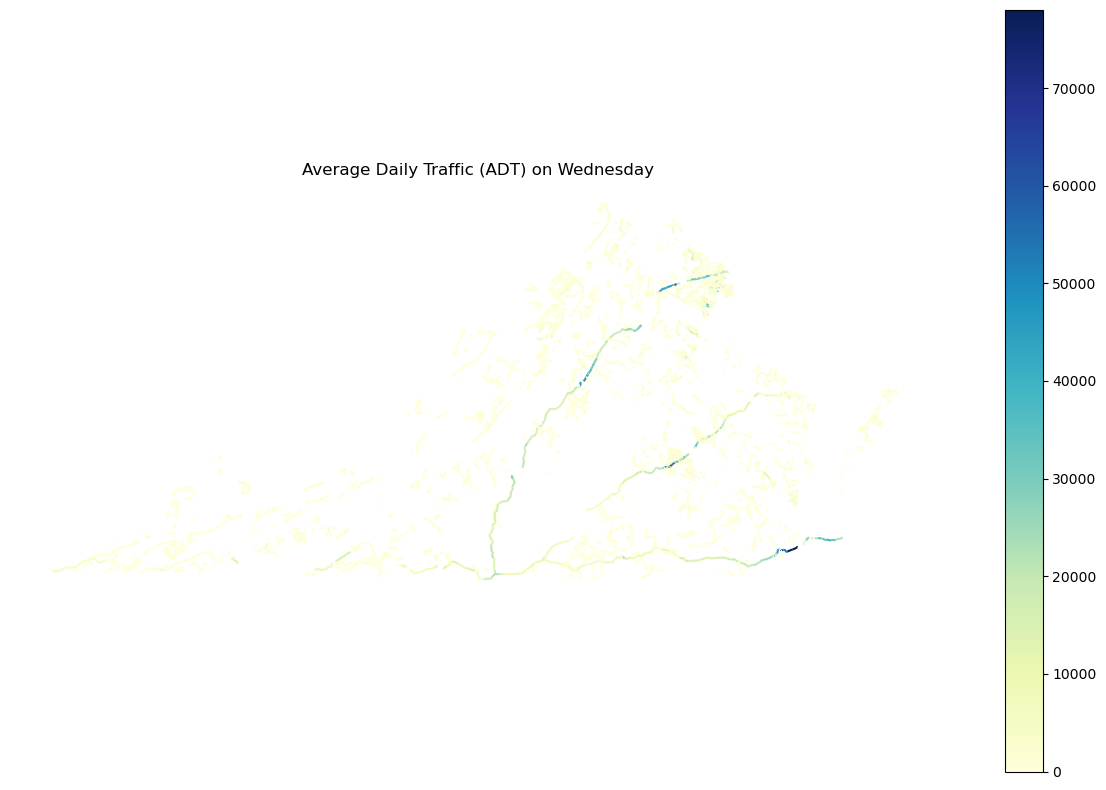

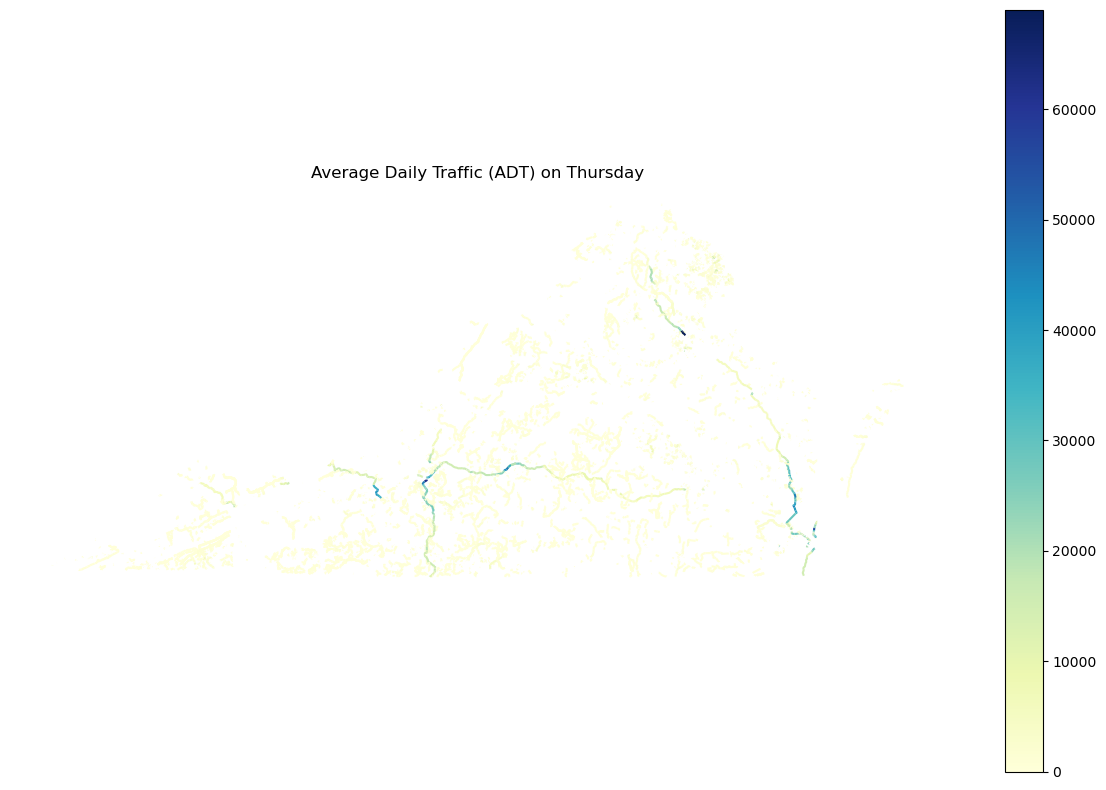

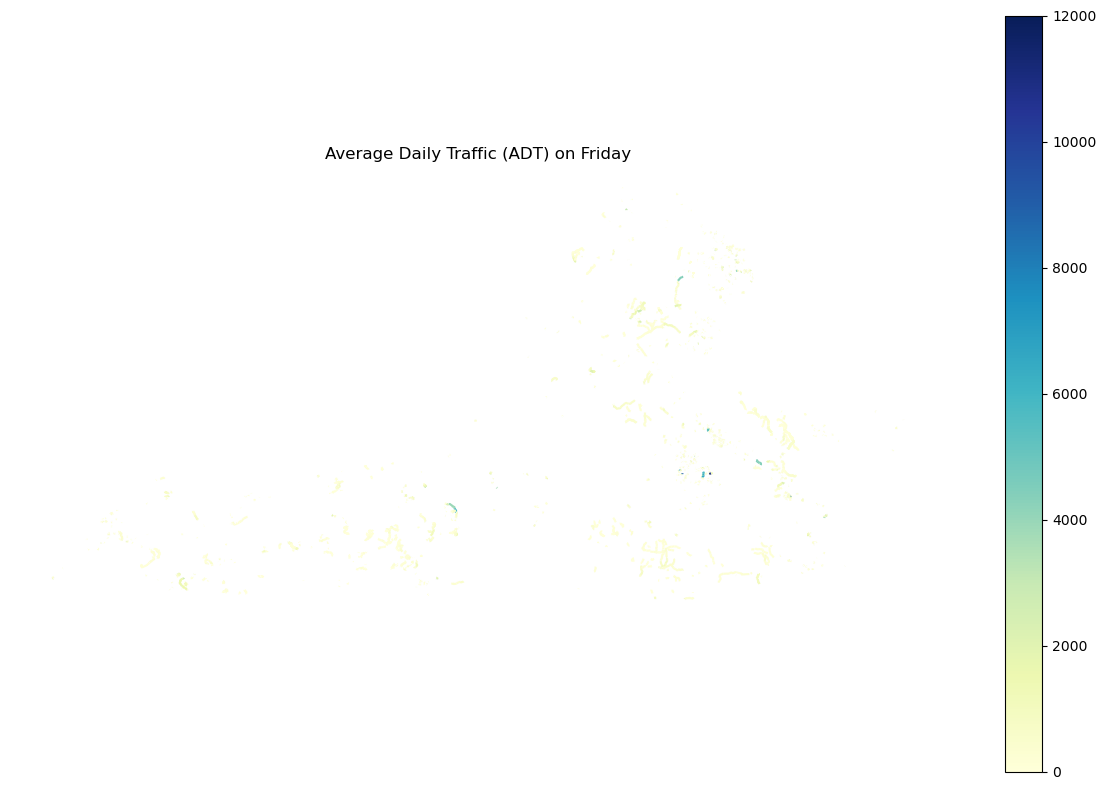

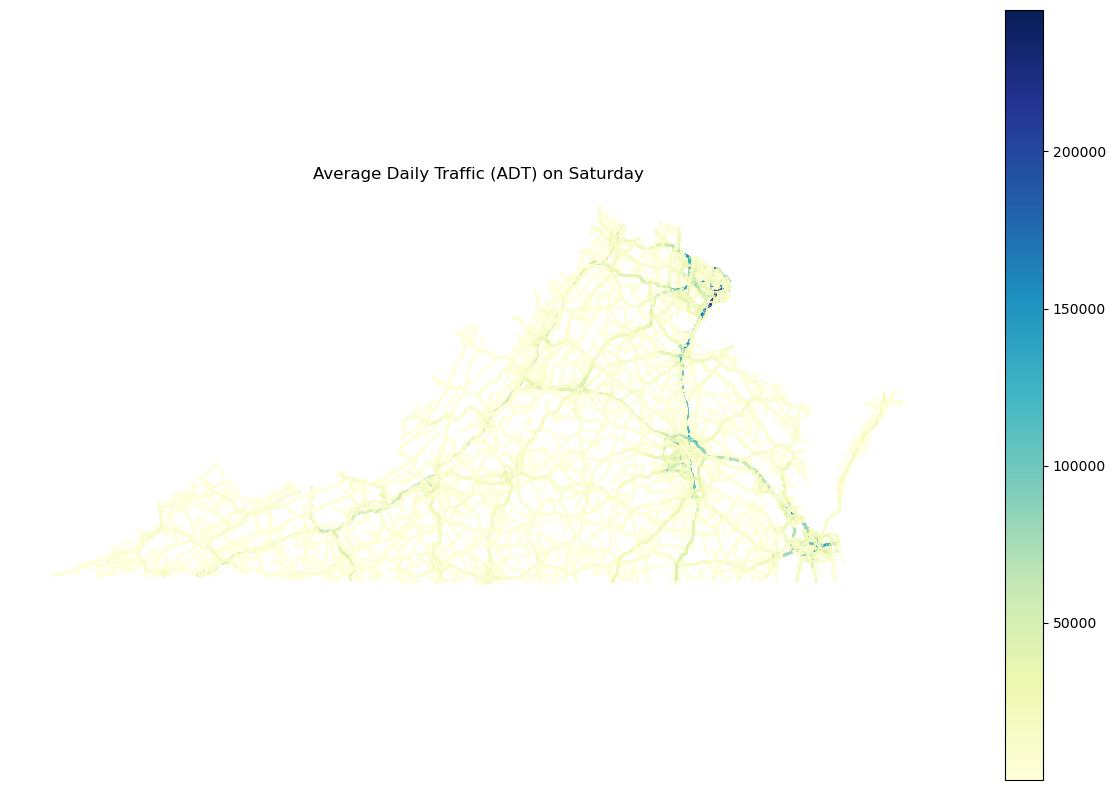

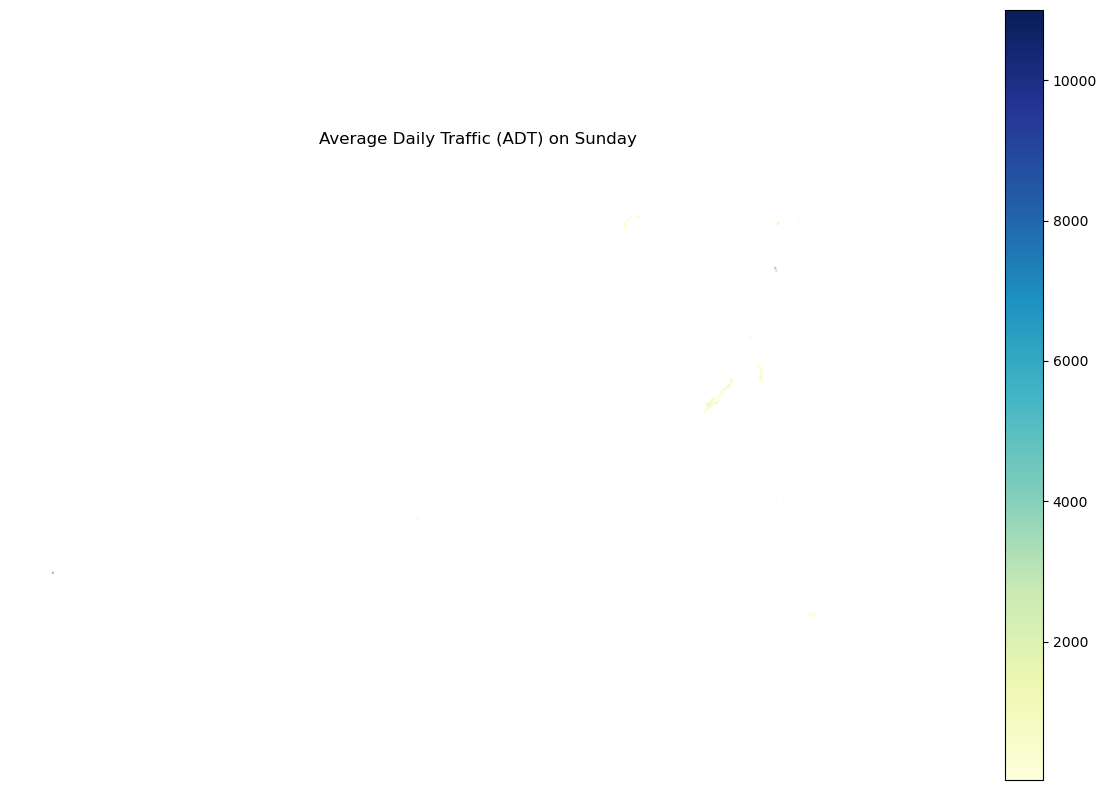

In [ ]:


geo_data = gpd.read_file('Traffic_Volume.geojson')

geo_data['RTE_ID'] = geo_data['RTE_ID'].astype(str)
test_set['RTE_ID'] = test_set['RTE_ID'].astype(str)

geo_test_data = geo_data.merge(test_set, on='RTE_ID', how='inner')

DAY_WEEK = ['monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday']

for day in DAY_WEEK:
    day_data = geo_test_data[geo_test_data['DAY_WEEK'] == day]
    
 
    fig, ax = plt.subplots(1, 1, figsize=(12, 8))
    day_data.plot(column='ADT_x', cmap='YlGnBu', legend=True, ax=ax)  
    
    
    ax.set_title(f'Average Daily Traffic (ADT) on {day.capitalize()}')
    ax.axis('off')

    plt.tight_layout()
    plt.show()


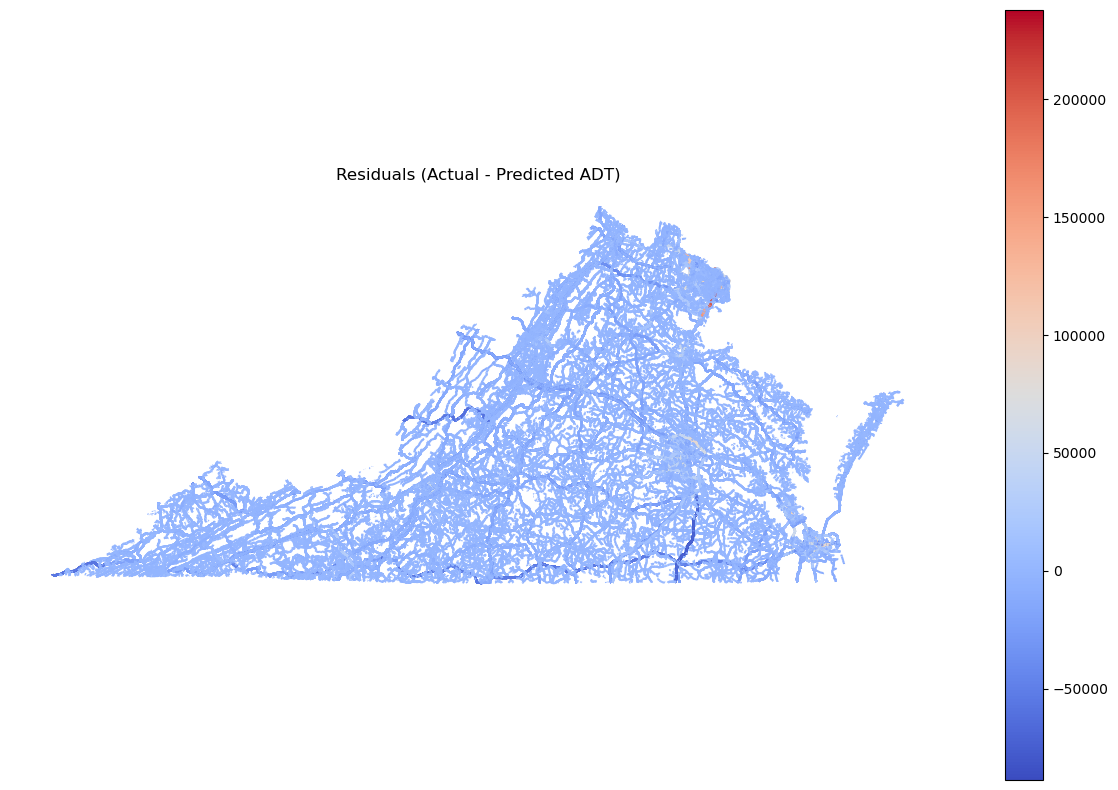

In [ ]:

test_set_copy = test_set.copy()  
test_prepared = full_pipeline.transform(test_set_copy) 


test_predictions = lin_reg.predict(test_prepared)


test_set_copy['Predicted_ADT'] = test_predictions

geo_data = gpd.read_file('Traffic_Volume.geojson')

geo_data['RTE_ID'] = geo_data['RTE_ID'].astype(str)
test_set_copy['RTE_ID'] = test_set_copy['RTE_ID'].astype(str)

geo_test_data = geo_data.merge(test_set_copy, on='RTE_ID', how='inner')

geo_test_data['Residual'] = geo_test_data['ADT_x'] - geo_test_data['Predicted_ADT']

fig, ax = plt.subplots(1, 1, figsize=(12, 8))
geo_test_data.plot(column='Residual', cmap='coolwarm', legend=True, ax=ax)

ax.set_title('Residuals (Actual - Predicted ADT)')
ax.axis('off')  

plt.tight_layout()
plt.show()
